# **Supervised Learning - Classification Project: INN Hotels**

- Student: Alexey Tyurin
- Group: Oct'22 C Sun - MLS Grp B
- Batch: PGP-DSBA-UTA-OCT22-C
- Date: 3/10/2023 - 3/17/2023

# INN Hotels - Problem Statement

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

## **Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# Importing necessary libraries and data

In [1]:
#!pip install nb_black

In [2]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    )


<IPython.core.display.Javascript object>

In [3]:
# Loding the dataset
df = pd.read_csv('/content/INNHotelsGroup.csv')

<IPython.core.display.Javascript object>

# User-defined functions

## Functions to carry out the EDA

### Combined boxplot and histogram

In [4]:
# functiom to create combined boxplot and histogram
def histogram_boxplot(data, feature, figsize=(10, 5), fmt='{:.1f}',
                      title=None, kde=True, bins=None, step=None, xlabel=None):
    x = data[feature]
    colors = sns.color_palette("Spectral")
    title = title if title else f'Distribution for `{feature}` column'

    x_min, x_max = x.min(), x.max()

    if (bins == None) & (step == None):
        bins = int(3 * np.log(x.nunique())) + 2
    elif bins == None:
        x_min = step * round(x_min / step, 0)
        x_max = step * round(x_max / step, 0) + step
        bins = int((x_max - x_min) / step)

    bw = (x_max - x_min) / bins

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=figsize,
                           gridspec_kw={"height_ratios": (0.3, 0.7)})

    plt.suptitle(title, fontsize=16)
    box = sns.boxplot(data=data, x=feature, ax=ax[0], showmeans=True, color=colors[1])
    hist = sns.histplot(data=data, x=feature, kde=kde, ax=ax[1], color=colors[4], bins=bins)

    ax[0].set_xlabel('')
    ax[1].axvline(x.median(), color="grey", linestyle="-")
    ax[1].axvline(x.mean(), color="darkgreen", linestyle="--")
    ax[1].set_ylabel('Number of bookings', fontsize=12)
    if xlabel: ax[1].set_xlabel(xlabel, fontsize=12)

    labels = [fmt.format(x) for x in np.arange(x_min, x_max, bw)]
    ticks =  [x+bw/2 for x in np.arange(x_min, x_max, bw)]

    ax[1].set_xticks(ticks)
    ax[1].set_xticklabels(labels)

    plt.show();

<IPython.core.display.Javascript object>

### Labeled barplots

In [5]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, percfmt="{:.1f}%", rnd=0,
                    figsize=(10, 5), xlabel=None, xlo=0, title=None, sort=True, 
                    orient='h'):
    """
    Barplot with percentage at the top

    data: dataframe
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    figsize: size of figure (default (10, 5))
    xlabel: label for x axis
    """

    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=xlo, fontsize=14)
    if orient == 'h':
      sns.countplot(data=data, x=feature, palette="Paired",
                    order=data[feature].value_counts().index[:n] if sort else None)
    else:
      sns.countplot(data=data, y=feature, palette="Paired",
                    order=data[feature].value_counts().index[:n] if sort else None)

    # draw lables
    for p in ax.patches:
      if orient == 'h':
        if perc == True: label = percfmt.format(100 * p.get_height() / data.shape[0])
        else: label = p.get_height()
        ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", size=11, xytext=(0, 5),
                    textcoords="offset points")
        ax.set_ylabel('Number of bookings', fontsize=14)
        if xlabel: ax.set_xlabel(xlabel, fontsize=14)
      else:
        if perc == True:
          label = percfmt.format(100 * p.get_width() / data.shape[0])
        else:
          label = p.get_height()
        ax.annotate(label, (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha="center", va="center", size=11, xytext=(15, 0),
                    textcoords="offset points")
        ax.set_xlabel('Number of bookings', fontsize=14)
        if xlabel: ax.set_ylabel(xlabel, fontsize=14)

    if title: plt.title(title, fontsize=16)
    else: plt.title(f'Distribution for `{feature}` column', fontsize=16)

    plt.show()

<IPython.core.display.Javascript object>

### Stacked barplot

In [6]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Distributions wrt target

In [7]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

## Functions to check and improve a classification model

### Function to plot the confusion_matrix and to compute metrics

In [8]:
# Defining a function to plot the confusion_matrix and to compute
# different metrics to check performance of a classification model

def model_performance(model, predictors, target, threshold=0.5, calc_only=False):
  """
  Function to plot the confusion_matrix with percentages and to compute
  different metrics to check classification model performance

  model: classifier
  predictors: independent variables
  target: dependent variable
  threshold: threshold for classifying the observation as class 1
  """

  pred = round(pd.Series(model.predict(predictors) > threshold))

  cm = confusion_matrix(target, pred)
  labels = np.asarray([f'{item:.0f}\n{item / cm.flatten().sum():.2%}' for item in cm.flatten()]).reshape(2, 2)

  # creating a dataframe of metrics
  metrics = pd.DataFrame(
      {"Accuracy": accuracy_score(target, pred), 
       "Recall": recall_score(target, pred), 
       "Precision": precision_score(target, pred), 
       "F1": f1_score(target, pred)
       },
       index=[0],
       )

  if calc_only != True:
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show();

    display(metrics);

  return metrics

<IPython.core.display.Javascript object>

###Function for Variance Inflation Factor

In [9]:
# Defining a function for Variance Inflation Factor

def checking_vif(predictors):
  vif = pd.DataFrame()
  vif["feature"] = predictors.columns

  # calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

  return vif

<IPython.core.display.Javascript object>

### Function for Multicollinearity problem solving

In [10]:
# Defining a function for multicollinearity problem solving

def mc_solving(model_perf, X, y):
# Outputting the VIF value for top-10 of all the variables
# Removing variables with high VIF

  predictors = X.copy()
  target = y.copy()
  res = model_perf.copy()

  res['feature to remove'] = '-= Base model with all vars =-'
  res['VIF'] = 0.0
  n = 0

  vif = checking_vif(predictors).sort_values(by='VIF', ascending=False)
  vif = vif[vif['VIF']>=5]
  var_to_remove = vif.iloc[0].feature

  while (len(vif) > 1) & (var_to_remove != ''):
    n += 1
    r = res.copy()
    print(f'\033[91m\nIteration # {n}\033[0m')
    for feature in vif.feature[1:]:
      item  = list(model_performance(
          sm.Logit(target, predictors.drop(feature, axis=1)).fit(method='bfgs', disp=False),
          predictors.drop(feature, axis=1), target, calc_only=True).values.flatten())
      
      item += [feature]
      item += [vif[vif['feature'] == feature]['VIF'].values[0]]

      r.loc[len(r.index)] = item
    
    display(r.sort_values('Recall', ascending=False))
    
    var_to_remove = r[1:].sort_values('Recall', ascending=False)['feature to remove'].iloc[0]
    print(f'\033[1m\nColumn to remove [{var_to_remove}]:\033[0m', sep='')
    var_to_remove = input()

    if var_to_remove:
      predictors.drop(var_to_remove, axis=1, inplace=True)
      vif = checking_vif(predictors).sort_values(by='VIF', ascending=False)
      vif = vif[vif['VIF']>=5]
    else:
      break

  print(f'\n\033[32m\033[1mMulticollinearity in the dataset has been resolved.\033[0m')

  return predictors.columns

<IPython.core.display.Javascript object>

### Function for high p-value variables treatment

In [11]:
# Defining a function to remove variables with high p-value from a model
def pv_solving(predictors):
  selected_features = predictors.columns.tolist()
  max_p_value = 1

  while len(selected_features) > 0:
      model = sm.Logit(y_train, predictors[selected_features]).fit(disp=False, method='bfgs')

      if max(model.pvalues) > 0.05:
          selected_features.remove(model.pvalues.idxmax())
          print(f'Column `{model.pvalues.idxmax()}` has been removed')
      else:
          break

  return selected_features

<IPython.core.display.Javascript object>

# Data Overview

- [x] Observations
- [x] Sanity checks

## Displaying few first and last rows of the dataset

In [12]:
# view the first five rows of the dataset
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [13]:
# view the first five rows of the dataset
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

<IPython.core.display.Javascript object>

## Distribution of variables in the data

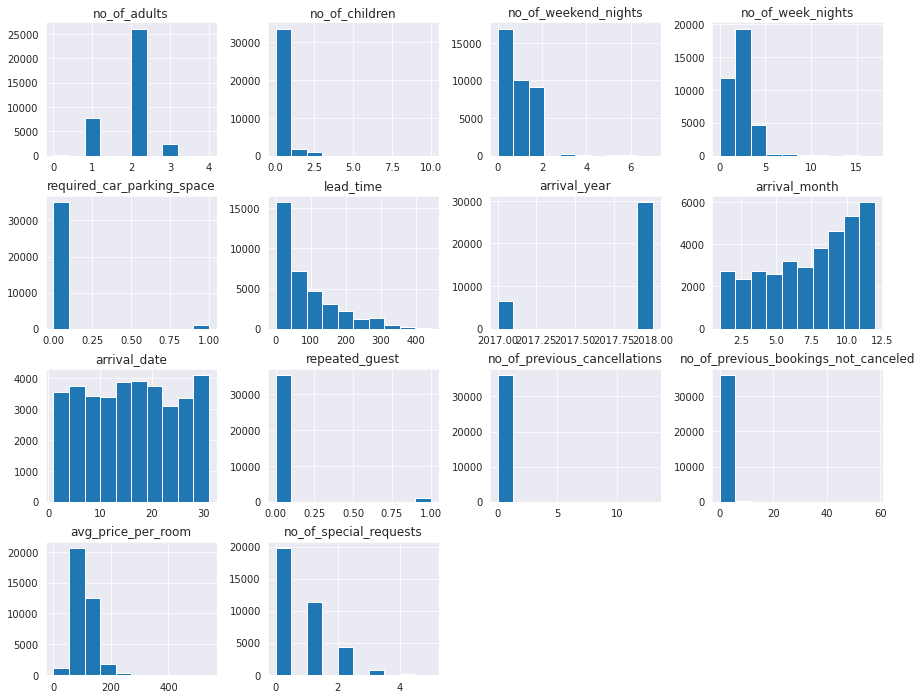

<IPython.core.display.Javascript object>

In [14]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 12))
plt.show()

In [15]:
for col in df.select_dtypes(include='object').columns[1:]:
  print(df.value_counts(col))
  print('-'*60)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
dtype: int64
------------------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
dtype: int64
------------------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
dtype: int64
------------------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
dtype: int64
------------------------------------------------------------


<IPython.core.display.Javascript object>

In [16]:
df['Booking_ID'].nunique()-df.shape[0]

0

<IPython.core.display.Javascript object>

* The data contains the different attributes of customers' booking details
* There are three types of meal plans those are 1, 2, and 3, and `Not Selected`
* There are seven types of rooms those are from 1 to 7
* There are five types of market segments those are `Online`, `Offline`, `Corporate`, `Complementary`, and `Aviation`
* There are two values (classes) of the dependent variable `booking_status`: `Not_Canceled` and `Canceled'
* The `Booking_ID` column is containing unique values

## Get information about the number of rows and columns in the dataset

In [17]:
# view the shape of the dataset
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

The dataset contains 36275 rows and 19 columns - 19 attributes/factors of 36275 bookings

## Checking the data types of the columns for the dataset

In [18]:
# view concise summary of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* There are 14 numeric (1 *float* and 13 *int* types) and 5 string (*object* type) columns in the dataset
* The target variable is the `booking_status ` which is of *object* type

## Checking for missing values

In [19]:
df.isna().sum().sum()

0

<IPython.core.display.Javascript object>

* There are no missing (Null, NA) values in the dataset.

## Dropping the duplicate values

In [20]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicate values in the dataset

## Statistical summary of the dataset

Let's check the statistical summary of the data.

In [21]:
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

<IPython.core.display.Javascript object>

In [22]:
df.describe(include='object').T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

<IPython.core.display.Javascript object>

* The `no_of_adults` ranges from 0 to 4. Usually, bookings are made for 2 adult persons
* The `no_of_children` ranges from 0 to 10. Usually, bookings are made with no children
* The `no_of_weekend_nights` ranges from 0 to 7. Usually, bookings are made for 1 weekend night
* The `no_of_week_nights` ranges from 0 to 17. Usually, bookings are made for 1-2 weeknights
* The `required_car_parking_space`: 3% of the bookings require a car parking space
* The `lead_time` ranges from 0 to 443 days. The average is 85, the median is 57, and the distribution is right-skewed or one-sided. 
* The `arrival_year`, `arrival_month`, `arrival_date`: bookings were made from year 2017-07-01 to 2018-12-31. There are some bookings made on 2018-02-29 that date does not exist as 2018 was not leap. Data need to be treated
* The `repeated guest`: 2.6% of bookings were made by repeated guests. Most of the bookings made by new customers
* The `no_of_previous_cancellations` ranges from 0 to 13. Usually, bookings are made with no previous cancellations
* The `no_of_previous_bookings_not_canceled` ranges from 0 to 58. Usually, bookings are made for the first time. But it seems there are some repeated guests with up to 58 of not canceled bookings in their past
* The `avg_price_per_room` ranges from 0 to 540 euros, the average is 103 euros, and the distribution is slightly right-skewed. 
* The `no_of_special_requests` ranges from 0 to 5. Usually, bookings are made with no special requests.
* There is a big difference between the 75th percentile and the maximum in many columns - outliers need to be checked
---
* There are four unique meal plan types. Plan 1 is the most popular
* There are seven unique room types. Room Type 1 is the most popular
* There are five unique types of the market segment. `Online` is the most popular
* There are two unique values of booking_status. `Not_Canceled` is the most frequent

## Sanity checks

In [23]:
# Sanity model is a model where all target values ​​are constant and equal to the 'Cancelled' value of the target column
# Let's estimate the values of main Classification metric of the sanity model.
# We will consider a model valuable if its scores (except Recall) are higher than values of the sanity check model.

y_sanity_test = (df['booking_status'].sample(frac = 0.3, random_state = 42) == 'Canceled').astype(int)

print('Sanity scores:')
print(f'Accuracy: {accuracy_score(y_sanity_test, [1] * len(y_sanity_test)):.4f}')
print(f'Recall: {recall_score(y_sanity_test, [1] * len(y_sanity_test)):.4f}')
print(f'Precision: {precision_score(y_sanity_test, [1] * len(y_sanity_test)):.4f}')
print(f'F1: {f1_score(y_sanity_test, [1] * len(y_sanity_test)):.4f}')


Sanity scores:
Accuracy: 0.3314
Recall: 1.0000
Precision: 0.3314
F1: 0.4978


<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions below will help us approach the analysis in the right manner and generate insights from the data
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

**`no_of_adults`**

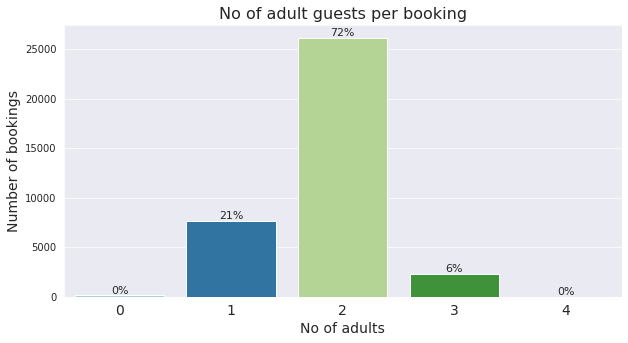

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data=df, feature='no_of_adults',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of adults', xlo=0,
                title='No of adult guests per booking')

* The average number of adults per booking is 1.84, mode and median are 2
* Zero means that the booking is for children only. Their adults perhaps made sepateted bookings for themselves.
* 72% of bookings were made for 2 adults, 21% - for 1 adult, 6% - for 3 adults, no adults, and 4 adults - less than 1% of the bookings

**`no_of_children`**

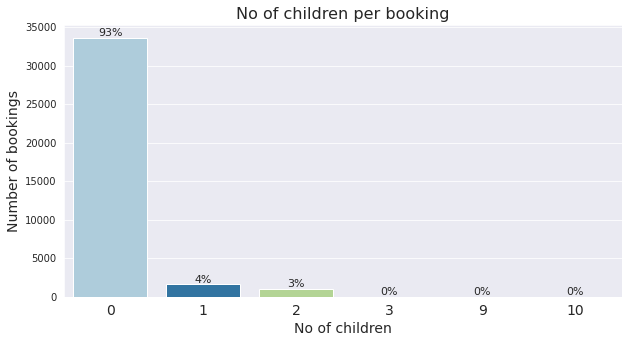

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data=df, feature='no_of_children',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of children', xlo=0,
                title='No of children per booking')


* Most of the bookings were made for adults only (no children) - 93%
* The average number of children per booking is 0.11, and the mode and median are 0
* There are some bookings in the dataset where the number of children is 9 and 10. Probably false values, data need to be treated accordingly
* 4% of bookings are for 2 children, 3% - for 1 child, more than 2 children - less than 1% of the bookings

**`no_of_weekend_nights`**

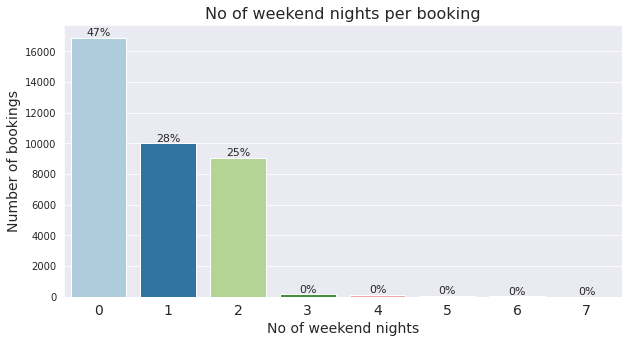

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data=df, feature='no_of_weekend_nights',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of weekend nights', xlo=0,
                title='No of weekend nights per booking')


* Most of the bookings do not consist of weekend nights - 47%
* The average number of weekend nights per booking is 0.81, and the median is 1
* 28% of bookings are for 1 weekend night, 25% - for 2 weekend nights, more than 2 weekend nights - less than 1% of the bookings

**`no_of_week_nights`**

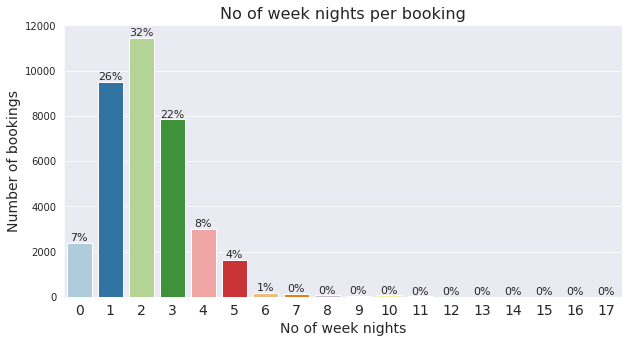

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data=df, feature='no_of_week_nights',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of week nights', xlo=0,
                title='No of week nights per booking')


* Most of the bookings are for 2 weekday nights - 32%
* The average number of weekday nights per booking is 2.2, and the median is 2
* 7% of bookings are for no weekday nights (weekend only), 26% - for 1 weekend night, 22% - for 3 weekend nights, 8% - 4, 4% - 5, 1% - 6, more than 7 weekday nights - less than 1% of the bookings

**`type_of_meal_plan`**

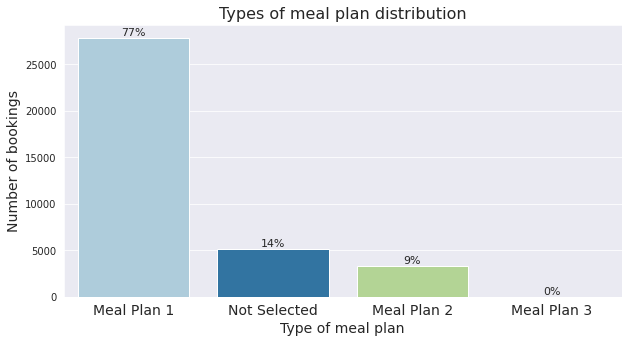

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data=df, feature='type_of_meal_plan',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Type of meal plan', xlo=0,
                title='Types of meal plan distribution')


* Most of the bookings are with `Meal Plan 1` selected - 7%
* 14% of bookings - no meal plan selected
* 9% - `Meal Plan 2`
* `Meal Plan 3` - less than 1% of the bookings

**`required_car_parking_space`**

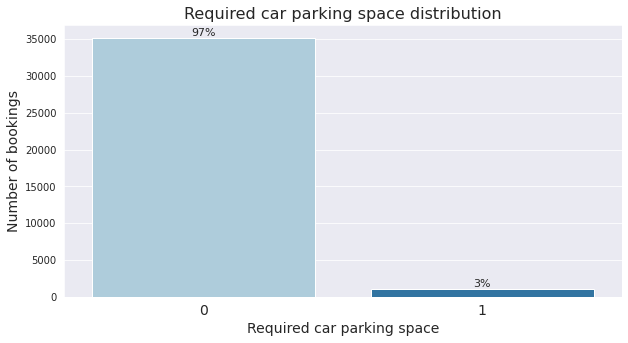

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data=df, feature='required_car_parking_space',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Required car parking space', xlo=0,
                title='Required car parking space distribution')


* 97% of the bookings are with no request for car parking space

**`room_type_reserved`**

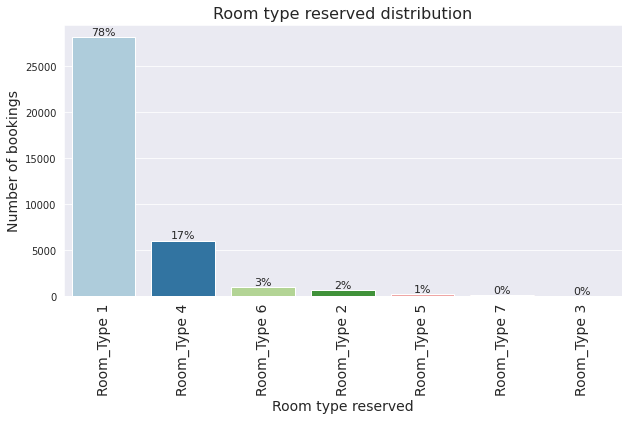

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data=df, feature='room_type_reserved',
                perc=True, n=None, percfmt="{:.0f}%", sort=True,
                figsize=(10, 5), xlabel='Room type reserved', xlo=90,
                title='Room type reserved distribution')


* Most of the bookings are with `Room Type 1` selected - 78%
* 17% of bookings - `Room Type 4`
* 3% of bookings - `Room Type 6`
* 2% of bookings - `Room Type 2`
* 1% of bookings - `Room Type 5`
* `Room Type 7` and `Room Type 3` - less than 1% of the bookings

**`lead_time`**

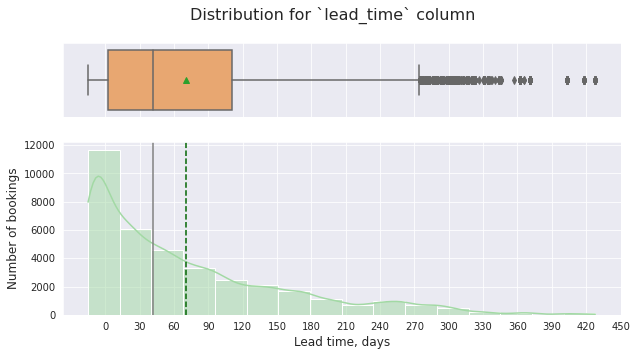

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data=df, feature='lead_time', step = 30,
                  xlabel='Lead time, days', fmt='{:.0f}',)

* The distribution of lead time looks an exponential by nature
* There are many outliers (lead time is more than nine months).
* Most of the booking were made with zero lead time - customers made their booking on the day of arrival
* The average lead time is 85 days, and the median is 57 days
* The maximum lead time is the dataset is 443 days

**`arrival_year`, `arrival_month`, `arrival_date`**

In [32]:
ddf = df[['arrival_year', 'arrival_month', 'arrival_date', 'booking_status']]
ddf['arrival'] = df.apply(lambda x: f"{x['arrival_year']}-{x['arrival_month']:02d}", axis=1)

<IPython.core.display.Javascript object>

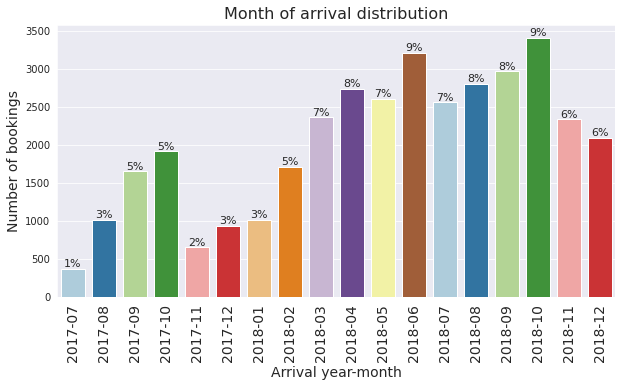

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data=ddf.sort_values(by='arrival'), feature='arrival',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Arrival year-month', xlo=90,
                title='Month of arrival distribution')

* Most of the bookings were made in October-2018 - 9%
* Less of the bookings were made in July-2017
* Number of bookings by months in 2017 seems to be significantly less than in 2018

**`market_segment_type`**

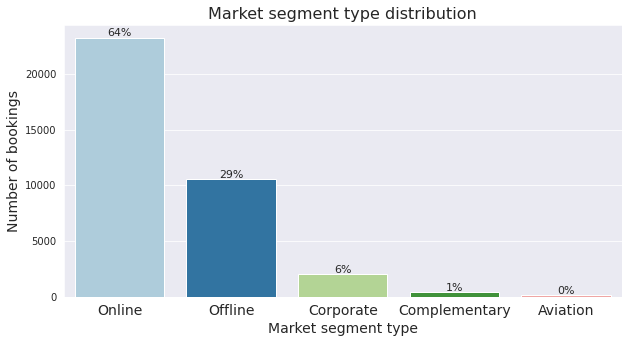

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data=df, feature='market_segment_type',
                perc=True, n=None, percfmt="{:.0f}%", sort=True,
                figsize=(10, 5), xlabel='Market segment type', xlo=0,
                title='Market segment type distribution')


* Most of the bookings came from the `Online` segment - 64% 
* 29% of bookings - `Offline` 
* 6% of bookings - `Corporate` 
* 1% of bookings - `Complimentary` 
* less than 1% of bookings - `Aviation`

**`repeated_guest`**

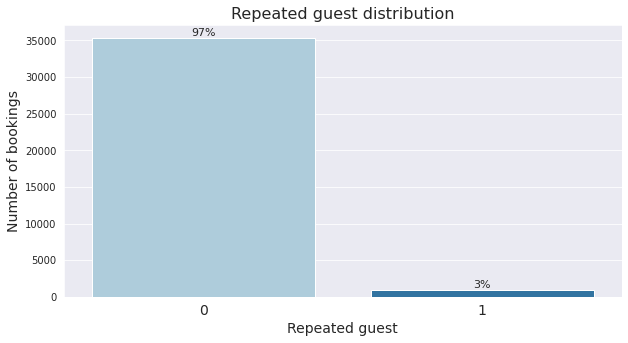

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data=df, feature='repeated_guest',
                perc=True, n=None, percfmt="{:.0f}%", sort=True,
                figsize=(10, 5), xlabel='Repeated guest', xlo=0,
                title='Repeated guest distribution')


* 97% of the booking made for the repeated guests

**`no_of_previous_cancellations`**

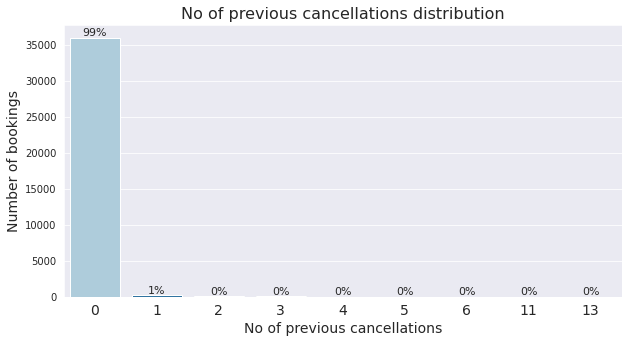

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data=df, feature='no_of_previous_cancellations',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of previous cancellations', xlo=0,
                title='No of previous cancellations distribution')


* 99% of the booking were made for the customers have no cancellations prior to the current booking.
* Very few customers have more than one cancellation.
* Some customers canceled their prvious booking 13 times.

**`no_of_previous_bookings_not_canceled`**

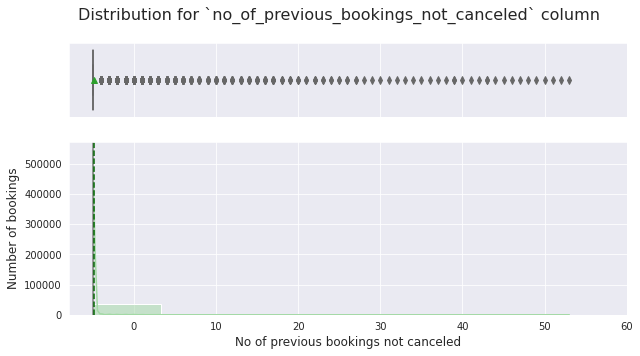

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data=df, feature='no_of_previous_bookings_not_canceled', step = 10,
                  xlabel='No of previous bookings not canceled', fmt='{:.0f}',)


* 98% of the bookings were made for customers who have no non-canceled booking prior the current booking. Most of the customers are first-time clients.
* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

**`avg_price_per_room`**

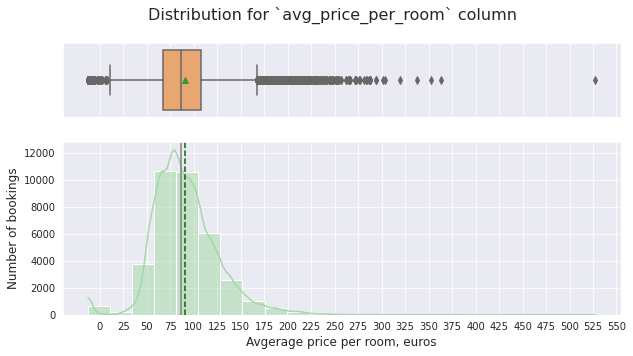

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data=df, feature='avg_price_per_room', step = 25,
                  xlabel='Avgerage price per room, euros', fmt='{:.0f}',)


* The distribution of average price per room is bell-shaped, right skewed.
* There are outliers on both sides.
* The mean value of the average price per room per booking is \$103.42. The median is \$99.45
* The minimum is \$0 - some rooms are free of charge (complimentary).
* The maximum is \$540.

**`no_of_special_requests`**

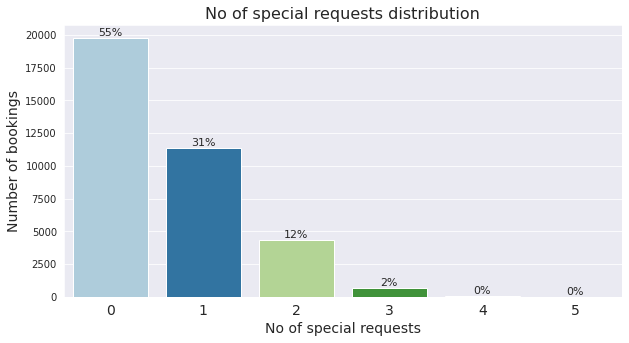

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data=df, feature='no_of_special_requests',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='No of special requests', xlo=0,
                title='No of special requests distribution')


* The distribution looks like an exponential by nature
* Most of the bookings (55%) were made with no special requests
* 31% - 1 special request
* 12% - 2 special requests
* 2% -3 special requests
* 4 or 5 special requests - less than 1%

**`booking_status`**

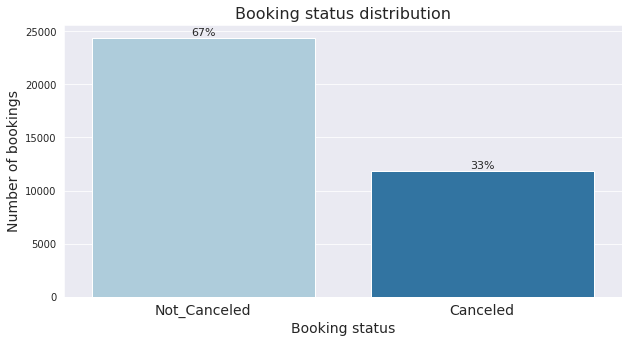

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data=df, feature='booking_status',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Booking status', xlo=0,
                title='Booking status distribution')


* 33% of the bookings were canceled
* 67% of the bookings were not canceled

## Bivariate Analysis

**Pairplot of continuous numerical variables**

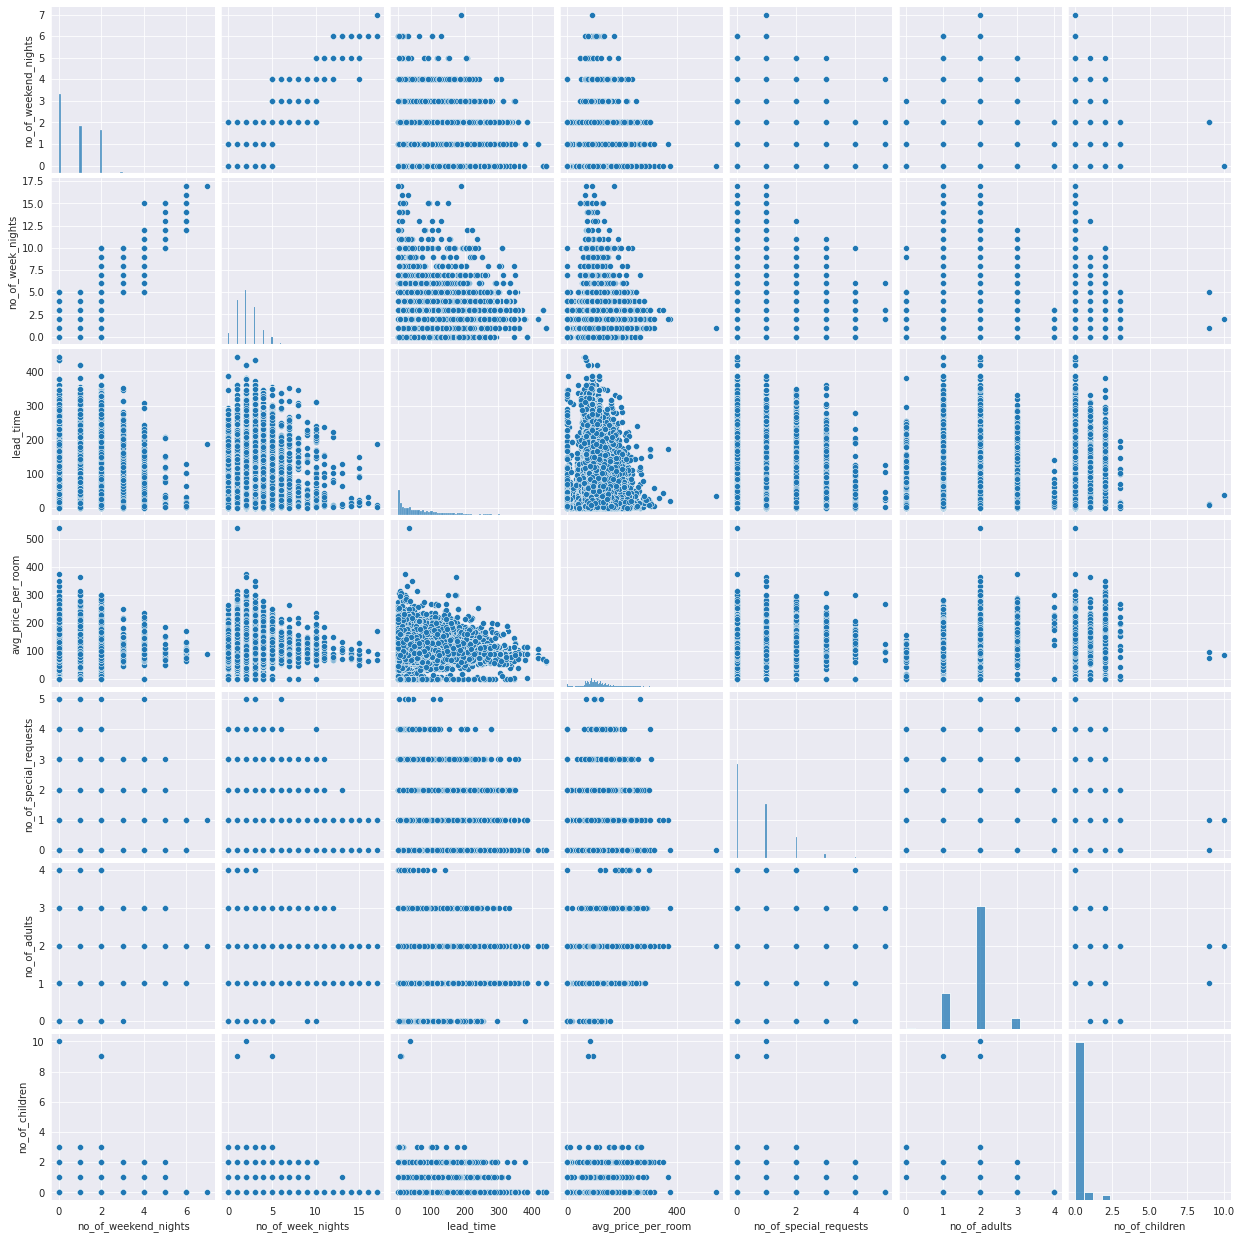

<IPython.core.display.Javascript object>

In [41]:
sns.pairplot(df[['no_of_weekend_nights', 
                 'no_of_week_nights', 
                 'lead_time', 
                 'avg_price_per_room', 
                 'no_of_special_requests', 
                 'no_of_adults',
                 'no_of_children']]);

**Correlation heatmap**

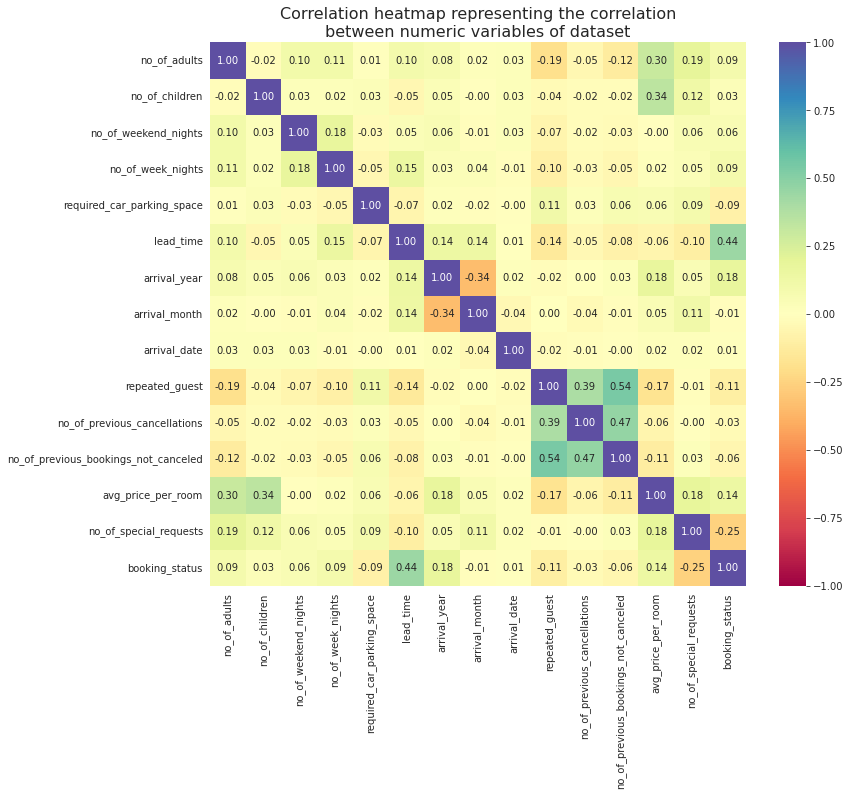

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.concat([df, pd.Series((df['booking_status'] == 'Canceled').astype(int))], axis=1).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xlabel('')
plt.ylabel('')
plt.title('Correlation heatmap representing the correlation\nbetween numeric variables of dataset', fontsize=16)
plt.show();

* Correlations between independent variables
  * There is a moderate positive correlation between `no_of_adults` / `no_of_children` and `avg_price_per_room`.
  * There is a weak positive correlation between `arrival_year` and `avg_price_per_room`. Prices grow.
  * There is a weak positive correlation between `no_of_special_requests` and `avg_price_per_room`. The more requests the more price.
  * There is a weak negative correlation between `repeated_guest` and `avg_price_per_room`. The repeated guest knows how to save.
  * There is a weak positive correlation between `no_of_special_requests` and `no_of_adults`. The more people the more requests.
  * There is a weak negative correlation between `repeated_guest` and `no_of_adults`. The repeated guests travel alone.
  * There is a moderate positive correlation between `repeated_guest` / `no_of_previous_bookings_not_canceled`, and `no_of_previous_cancellations`. Data need to be treated to avoid multicollinearity
  * There is a weak positive correlation between `no_of_week_nights` and `no_of_weekend_nights`.
  * There is a weak positive correlation between `lead_time` and `no_of_week_nights`. Long stays are planned in advance.
  * There is a moderate negative correlation between `arrival_year` and  `arrival_month`due to not equal number of months in 2017/18

* Correlations between the dependent variable and predictors
  * There is a close to a moderate negative correlation between the `no_of_special_requests` and the `booking_status`. The higher number of special requests the fewer odds that the booking is cancellated.

  * There is a moderate positive correlation between `booking_status` and `lead_time`. The higher the lead time the higher odds of cancellation.

guests                 1      2     3    4   5  10  11  12    All
room_type_reserved                                               
Room_Type 2           18    598    27   46   2   0   1   0    692
All                 7552  23942  3851  912  15   1   1   1  36275
Room_Type 1         6847  19534  1729   19   0   1   0   0  28130
Room_Type 3            3      4     0    0   0   0   0   0      7
Room_Type 4          556   3572  1913   15   0   0   0   1   6057
Room_Type 5           98    117    36   14   0   0   0   0    265
Room_Type 6           16     73   117  755   5   0   0   0    966
Room_Type 7           14     44    29   63   8   0   0   0    158
------------------------------------------------------------------------------------------------------------------------


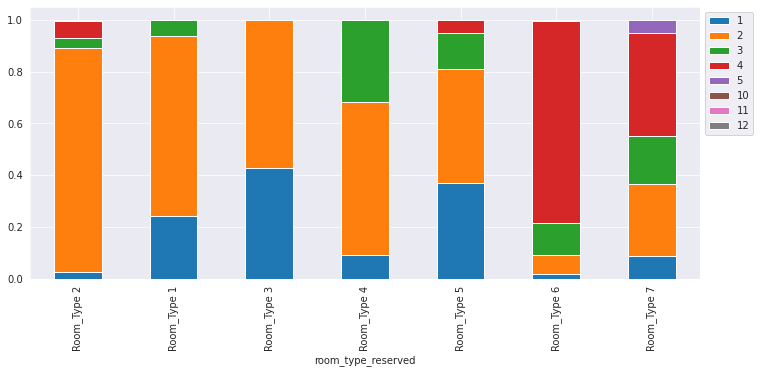

<IPython.core.display.Javascript object>

In [43]:
temp = df[['room_type_reserved', 'no_of_children', 'no_of_adults']]
temp['guests'] = temp['no_of_children'] + temp['no_of_adults']
stacked_barplot(temp, "room_type_reserved", "guests")

room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
no_of_children                                                           
0                         26785          482            7         5850   
All                       28129          691            7         6056   
1                          1309           25            0          191   
2                            34          179            0           15   
3                             1            5            0            0   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7    All  
no_of_children                                                    
0                           241          121           91  33577  
All                         265          966          158  36272  
1                            13           64           16   1618  
2                            11          776           43   1058  
3                             0            5            8     19  
------------

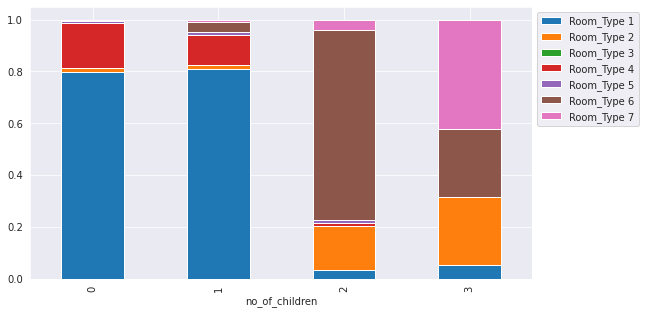

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df[df['no_of_children']<4], "no_of_children", "room_type_reserved")

* `Room Type 1` "Double" - is most popular, capacity is up to 2 adults + child
* `Room Type 4` "Double+" followed by the `Room Type 1`. Capacity is up to 3 adults
* `Room Type 2` "Family" capacity is up to 3 persons (Adult+Child(ren))
* `Room Type 6` "Family+" - capacity is up to 4 persons. Usually for 2 adults + 2 children

**Let's see how the `no_of_weekend_nights` varies across the `no_of_week_nights`**

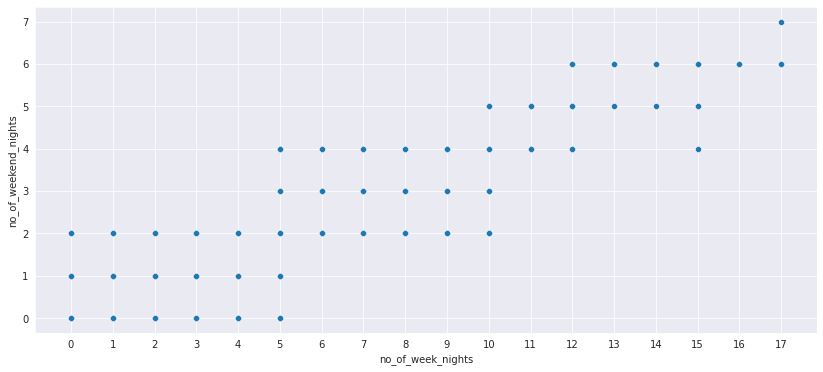

no_of_week_nights       0     1     2     3     4    5    6   7   8   9   10  \
no_of_weekend_nights                                                           
0                       78  5082  5745  4180  1529  258                        
1                     1522  1940  3406  2071   743  313                        
2                      787  2466  2293  1588   718  973  126  63  38  14   5   
3                                                    53   31  39  14   9   7   
4                                                    17   32  11  10  11  32   
5                                                                         18   
6                                                                              
7                                                                              

no_of_week_nights     11 12 13 14 15 16 17  
no_of_weekend_nights                        
0                                           
1                                           
2                                           
3                                           
4                     13  2        1        
5                      4  5  1  1  5        
6                         2  4  6  4  2  2  
7                                        1

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(14,6));
ax = sns.scatterplot(data=df, x='no_of_week_nights', y='no_of_weekend_nights')

ax.set_xticks(np.arange(0, 18, step=1))
plt.show()

display(df.pivot_table(index='no_of_weekend_nights', columns='no_of_week_nights', aggfunc='count', values='Booking_ID').fillna(0).astype(int).replace({0: ''}));

* The distribution of numbers of weekend nights looks reasonable in comparison with the number of weekday nights per booking

**Let's see how the target variable varies across the number of special requests**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


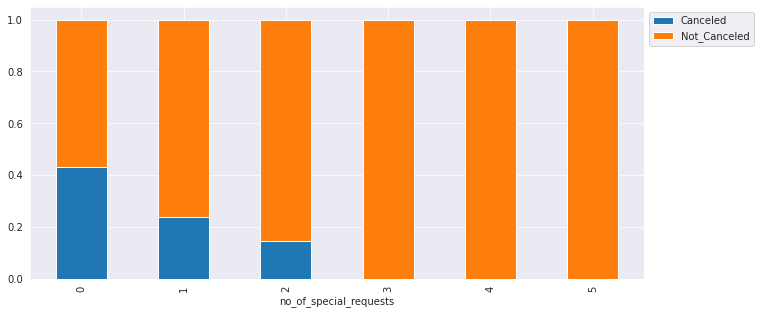

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* Bookings made with more than two special  requests have a high chance to be not canceled.

**Let's see how the average price per room varies by the number of special requests**

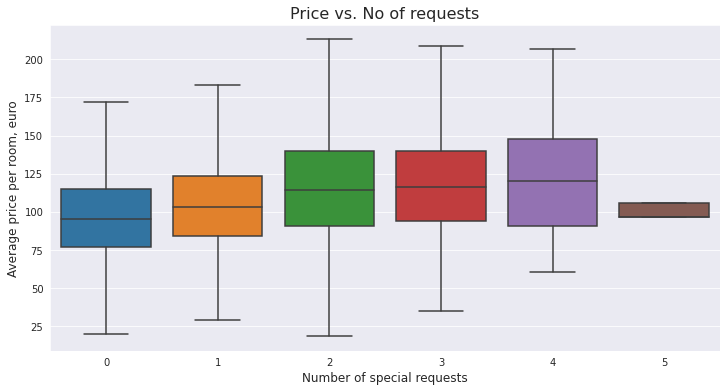

<IPython.core.display.Javascript object>

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='no_of_special_requests', y='avg_price_per_room', ax=ax, showfliers=False)
plt.xlabel('Number of special requests', fontsize=12)
plt.ylabel('Average price per room, euro', fontsize=12)
plt.title('Price vs. No of requests', fontsize=16)
plt.show();

* The median prices are growing with the growing number of special requests

**Let's see how the target variable varies across the number of adult guests**

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


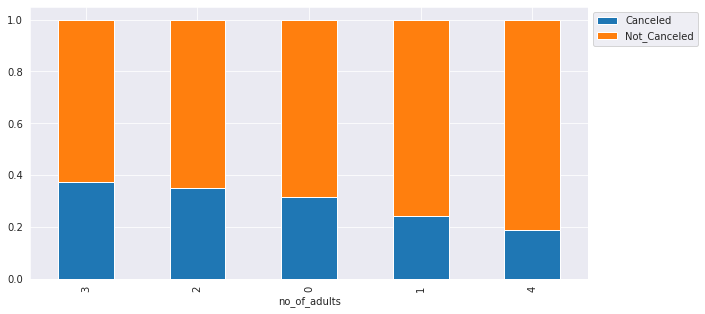

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "no_of_adults", "booking_status")

* The highest percent of cancelations occurred in the bookings for 3 of adults guests - 37%
* The lowest percent of cancelations occurred in the bookings for 4 of adults guests - 19%

**Let's see how the target variable varies across the market segment type**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


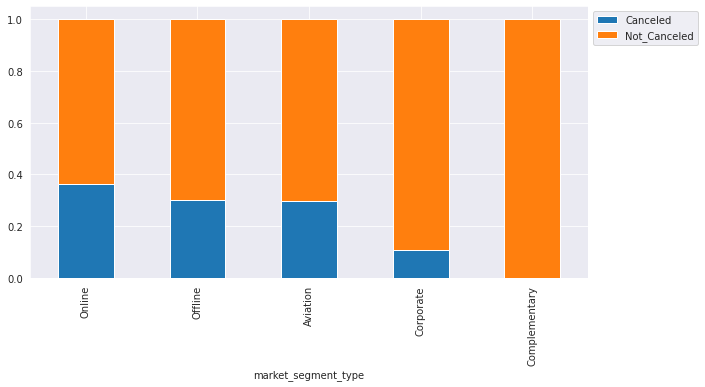

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "market_segment_type", "booking_status")

* The proportion of canceled bookings made Online is slightly higher than those from Offline or Aviation 
* Corporate segment shows low cancellations proportion

**Let's analyze the relation between Lead time and Segment**

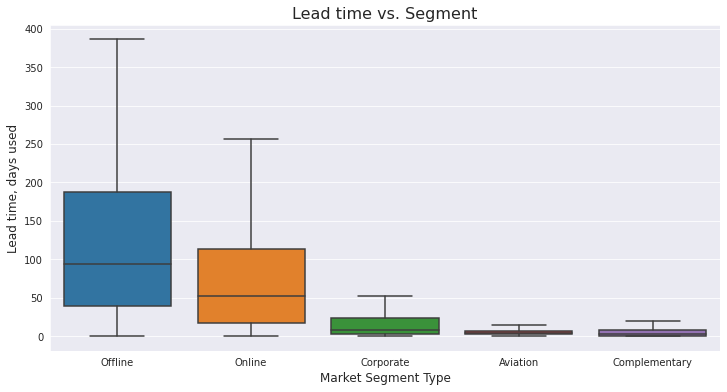

<IPython.core.display.Javascript object>

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment_type', y='lead_time', ax=ax, showfliers=False)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Lead time, days used', fontsize=12)
plt.title('Lead time vs. Segment', fontsize=16)
plt.show()

* The bookings that came from the Complementary, Aviation, and Corporate segments have the lead time less than a month on average
* The bookings made Offline have a higher median and higher range of lead time compared with the Online bookings


**Let's analyze the relation between Price and Segment**

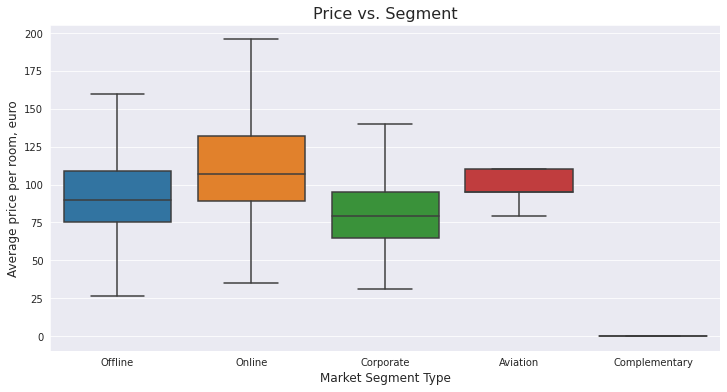

<IPython.core.display.Javascript object>

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', ax=ax, showfliers=False)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average price per room, euro', fontsize=12)
plt.title('Price vs. Segment', fontsize=16)
plt.show()

* The bookings made Online have higher median and higher range of prices.
* The bookings came from Offline and Corporate segments are almost similar. The Corporate one has slightly lower median price
* The bookings came from Aviation segment have narroew range of prices.
* The Complementary segment has low or zero prices.

**Let's analyze the relation between Average price per room and Status**

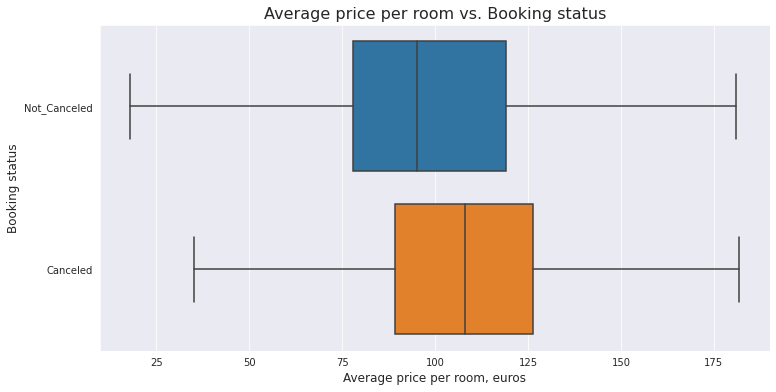

<IPython.core.display.Javascript object>

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='avg_price_per_room', y='booking_status', ax=ax, showfliers=False)
plt.ylabel('Booking status', fontsize=12)
plt.xlabel('Average price per room, euros', fontsize=12)
plt.title('Average price per room vs. Booking status', fontsize=16)
plt.show()

* The median price of canceled bookings is slightly higher than the median price of not canceled bookings

**Let's analyze the relation between Year-Month of arrival and Status**

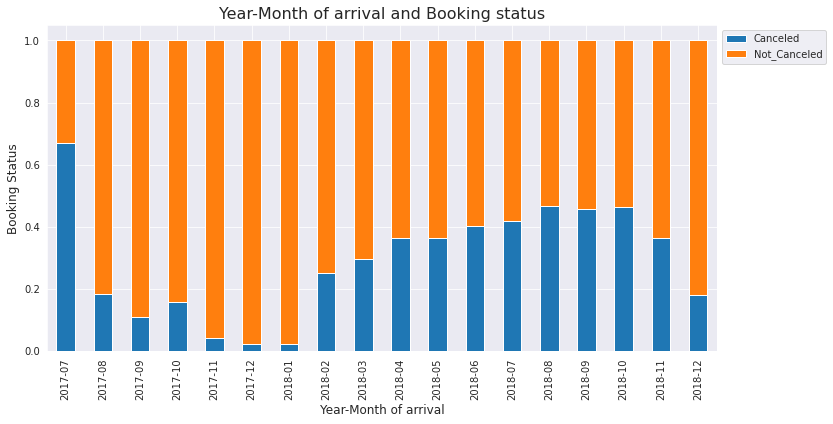

<IPython.core.display.Javascript object>

In [53]:
tab = pd.crosstab(ddf['arrival'], ddf['booking_status'], normalize="index")
tab.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Year-Month of arrival', fontsize=12)
plt.ylabel('Booking Status', fontsize=12)
plt.title('Year-Month of arrival and Booking status', fontsize=16)
plt.show();

* Most cancellations (~65%) were made in July-2017 
* Less cancellations (>5%) were made in December-2017 and January-2018

**Let's analyze the relation between Average Price per Room and Booking status**

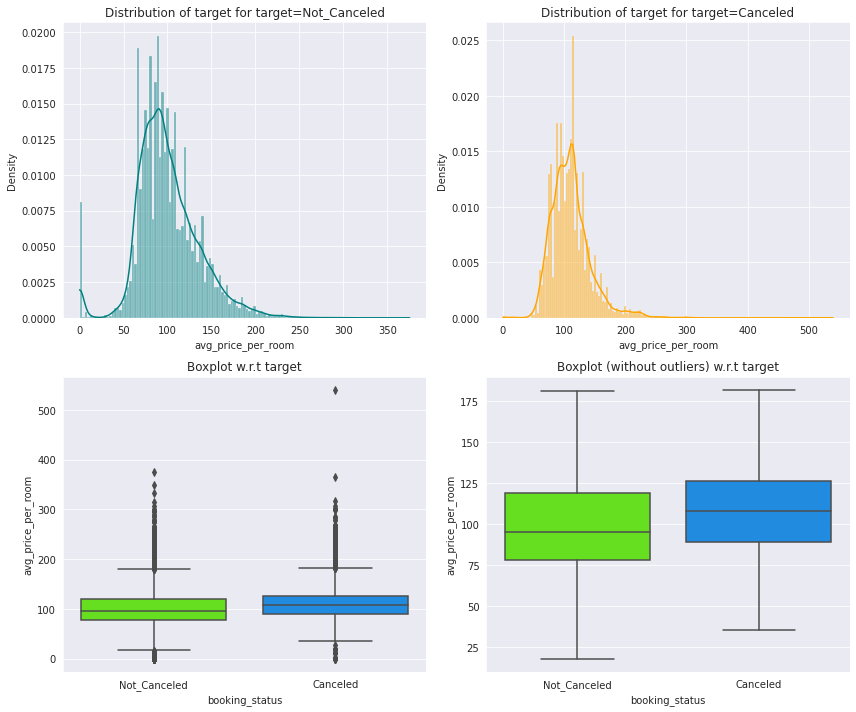

<IPython.core.display.Javascript object>

In [54]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* The distributions are quite similar.
* Most of the cancellations occur at booking with slightly higher average price per room. However, for more accurate conclusion t-test need to be done, as the means seems very close to each others.

**Let's analyze the relation between Lead Time and Booking status**

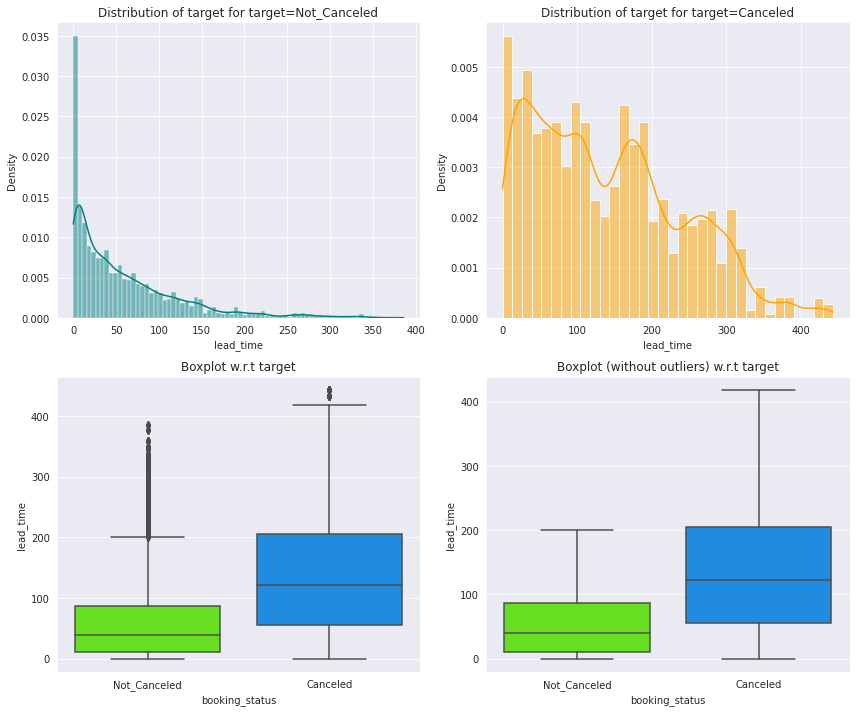

<IPython.core.display.Javascript object>

In [55]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

* The median lead time for bookings that were canceled is different from the bookings that were not canceled. Most of the cancellations occur at booking with a higher lead time. 
* The higher the lead time, the higher odds of a booking cancelation.

## Leading Questions

>**1. What are the busiest months in the hotel?**

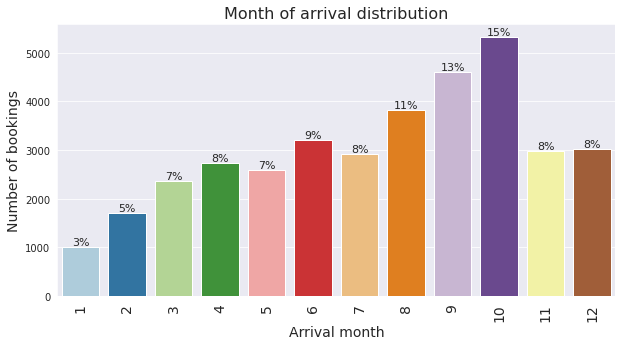

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data=df.sort_values(by='arrival_month'), feature='arrival_month',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Arrival month', xlo=90,
                title='Month of arrival distribution')

In [57]:
mos = pd.pivot_table(data=df, index='arrival_month', columns='arrival_year', values='Booking_ID', aggfunc='count', margins=True).fillna(0)
mos['2017_%'] = 100 * mos[2017] / mos[2017]['All']
mos['2018_%'] = 100 * mos[2018] / mos[2018]['All']
mos.apply(lambda x: x.astype(int))

arrival_year   2017   2018    All  2017_%  2018_%
arrival_month                                    
1                 0   1014   1014       0       3
2                 0   1704   1704       0       5
3                 0   2358   2358       0       7
4                 0   2736   2736       0       9
5                 0   2598   2598       0       8
6                 0   3203   3203       0      10
7               363   2557   2920       5       8
8              1014   2799   3813      15       9
9              1649   2962   4611      25       9
10             1913   3404   5317      29      11
11              647   2333   2980       9       7
12              928   2093   3021      14       7
All            6514  29761  36275     100     100

<IPython.core.display.Javascript object>

>* The simple answer is the busiest months in the hotel is **October** followed by **September**
* However, there are no data for the first half of 2017 in the dataset. Therefore, we can not say what was the busiest month on average for two years
* Most of the bookings of 2018 (11%) were in October
* More than 10% of all bookings of 2018 were in June (no data for June 2017)
* Based on incomplete data of 2017, we can say that October was the busiest month this year (29% of bookings made in Jul-Dec were in October)
* The next busiest month of 2017 based on the half-year data was September - 25% of bookings made in Jul-Dec of 2017 were in Sepember

>**2. Which market segment do most of the guests come from?**

In [58]:
q2 = df.groupby('market_segment_type').agg({'market_segment_type': 'count', 'no_of_adults': 'sum', 'no_of_children': 'sum'}).rename(columns={'market_segment_type': 'bookings'})
q2['no_of_guests'] = q2['no_of_adults'] + q2['no_of_children']

print('\nActual numbers:')
display(q2)
print('\n\nPercentages:')
display(round(100 * q2 / q2.sum(axis=0),1))


Actual numbers:


bookings  no_of_adults  no_of_children  no_of_guests
market_segment_type                                                      
Aviation                  125           127               0           127
Complementary             391           580              49           629
Corporate                2017          2481              20          2501
Offline                 10528         18715             222         18937
Online                  23214         45023            3528         48551



Percentages:


bookings  no_of_adults  no_of_children  no_of_guests
market_segment_type                                                      
Aviation              0.30000       0.20000         0.00000       0.20000
Complementary         1.10000       0.90000         1.30000       0.90000
Corporate             5.60000       3.70000         0.50000       3.50000
Offline              29.00000      28.00000         5.80000      26.80000
Online               64.00000      67.30000        92.40000      68.60000

<IPython.core.display.Javascript object>

>- Most of the guests 48551 (68.6%) come from `Online` market segment
- Most of the bookings 23214 (64%) come from `Online` market segment

>**3. Hotel rates are dynamic and change according to demand and customer demographics. <br>What are the differences in room prices in different market segments?**

count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.63268 24.99560 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 540.00000  
Online              107.10000 131.75000 375.50000

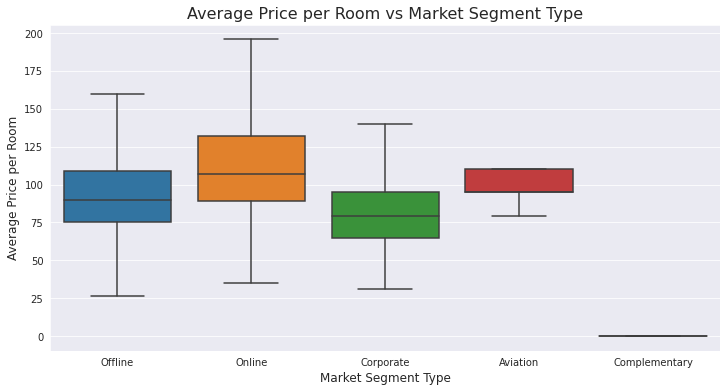

<IPython.core.display.Javascript object>

In [59]:
q3 = df.groupby('market_segment_type').avg_price_per_room
display(q3.describe())
print('\n')

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', ax=ax, showfliers=False)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Price per Room', fontsize=12)
plt.title('Average Price per Room vs Market Segment Type', fontsize=16)
plt.show()

>* Room prices of `Online` market segment (~112EUR) are higher than from other segments and have wider range (IQR: 89EUR - 132EUR)
* `Aviation`: ~101EUR (IQR: 95EUR - 110EUR)
* `Offline`: ~92EUR (IQR: 75EUR - 109EUR)
* `Corporate`: ~83EUR (IQR: 65EUR - 95EUR)
* `Complimentary` is free in most cases, but may be up to 170EUR in some cases

>**4. What percentage of bookings are canceled?**

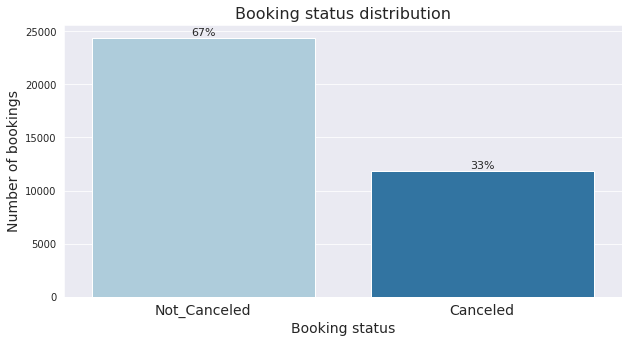

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data=df, feature='booking_status',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Booking status', xlo=0,
                title='Booking status distribution')


>* 33% of the bookings in the datatset were cancelled

>**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity.<br>What percentage of repeating guests cancel?**

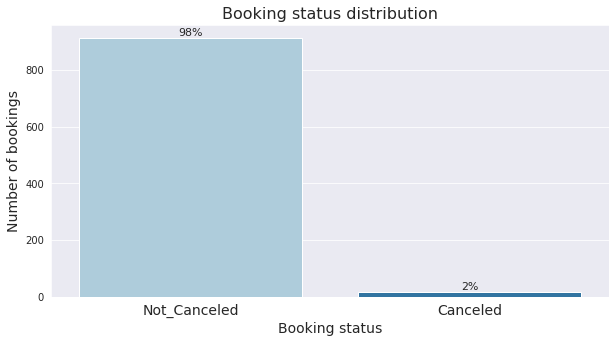

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(data=df[df['repeated_guest']==1], feature='booking_status',
                perc=True, n=None, percfmt="{:.0f}%", sort=False,
                figsize=(10, 5), xlabel='Booking status', xlo=0,
                title='Booking status distribution')

>* 2% of the bookings came from repeating guests were cancelled

>**6. Many guests have special requirements when booking a hotel room.<br>Do these requirements affect booking cancellation?**

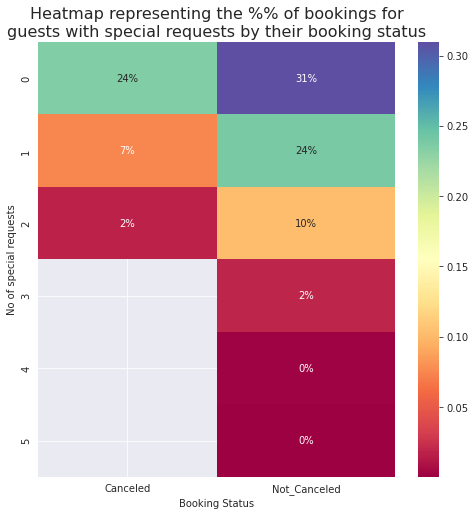

<IPython.core.display.Javascript object>

In [62]:
q6 = pd.pivot_table(data=df, index='no_of_special_requests', columns='booking_status', values='Booking_ID', aggfunc='count')/df.shape[0]

plt.figure(figsize=(8, 8))
sns.heatmap(q6, annot=True, fmt=".0%", cmap="Spectral")
plt.xlabel('Booking Status')
plt.ylabel('No of special requests')
plt.title('Heatmap representing the %% of bookings for\nguests with special requests by their booking status', fontsize=16)
plt.show();


booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


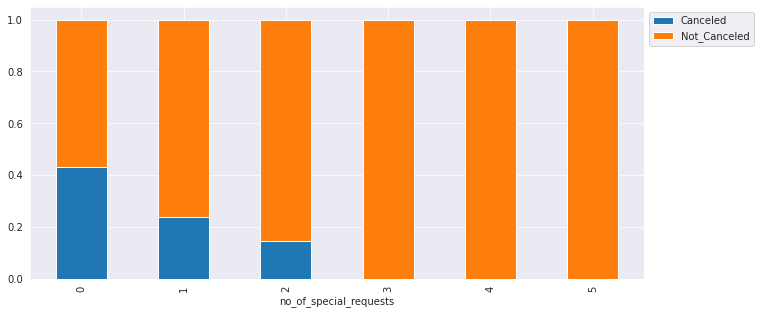

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


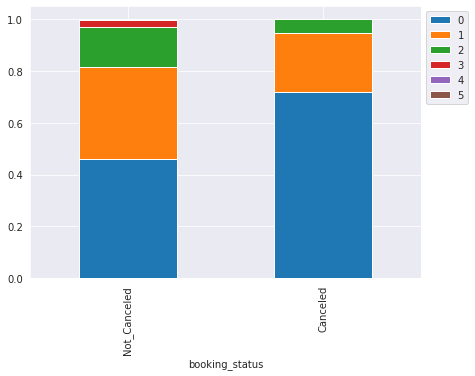

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(df, "booking_status", "no_of_special_requests")

>* There is no information about cancellations for the booking with more than two special requests in the dataset
* 43% of cancellations happened when a guest had no special requests during their booking process
* Most of the not canceled bookings had no special requests
* Biggest group (31%) of those with no special request who did not cancel the booking
* Among those who canceled the booking, most did not have any special requests, some had one request and few had two requests
* Bookings with 1-2 special requests tend to be not canceled in comparison with those with no special requests

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

##Missing value treatment (if needed)

In [65]:
print(f'Total number of missing values is {df.isnull().sum().sum()}')

Total number of missing values is 0


<IPython.core.display.Javascript object>

* There is no missing values (NaN, None, etc.) in the dataset
* Statistical summary of the dataset shows that there is no unexpected zeroes in the dataset as well

##Feature engineering (if needed)

**Dropping the columns with all unique values**

In [66]:
df['Booking_ID'].nunique()

36275

<IPython.core.display.Javascript object>

The `Booking_ID` column contains only unique values, so we can drop it

In [67]:
df = df.drop('Booking_ID', axis=1)

<IPython.core.display.Javascript object>

**Adding column with day of week of booking (canceled)**

In [68]:
# Adding column with day of week of booking

#dowt = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Converting arrival columns to date format at first
#df['arrival'] = df.apply(lambda x: f"{x['arrival_month']}/{x['arrival_date']}/{x['arrival_year']}", axis=1)

# There are some false values `2/29/2018` in the data which requires pre-processing. 
# It is important to thoroughly clean and preprocess the data before modeling to ensure that the dataset is accurate and reliable.

# Removing the false values
#df = df[df['arrival'] != '2/29/2018']

# Updating the false values
#df.loc[df['arrival'] == '2/29/2018', 'arrival'] = '2/28/2018'

# Adding DOW to the dataset as text
#df['arrival_dow'] = pd.to_datetime(df['arrival']).dt.weekday.replace(dowt)

#df.value_counts('arrival_dow')

# Dropping temporary column to avoid multicollinearity and 'arrival_date'
#df = df.drop(['arrival', 'arrival_date'], axis=1)


<IPython.core.display.Javascript object>

In [69]:
# Converting some vars to binary
df['repeated_guest'] = df['repeated_guest'].astype('uint8')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('uint8')
df['previous_cancellations'] = (df['no_of_previous_cancellations'] != 0).astype('uint8')
df['children'] = (df['no_of_children'] > 0).astype('uint8')

# Converting type_of_meal_plan to discrete numeric var as it represents number of meal times
mp_repl = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(mp_repl).astype('int')

# Dropping insignificant vars
df.drop(['no_of_previous_cancellations', 
         'no_of_previous_bookings_not_canceled', 
         'no_of_adults', 'no_of_children',
         'arrival_date',
         ], axis=1, inplace=True)

<IPython.core.display.Javascript object>

##Outlier detection and treatment (if needed)

**Let's check for outliers in the data.**

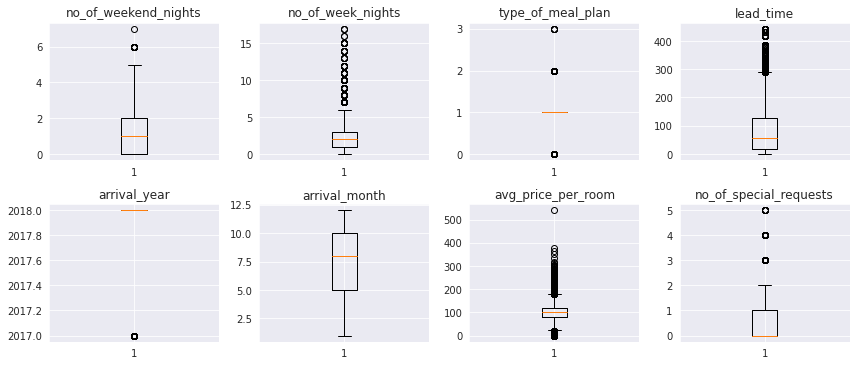

<IPython.core.display.Javascript object>

In [70]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=[int, float]).columns.tolist()

plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show();

In [71]:
# Instead of drop rows with outliers we updade them with new values

cols = ['avg_price_per_room', 'lead_time'] # 'no_of_weekend_nights', 'no_of_week_nights'

for col in cols:
  q1, q3 = df[col].quantile([0.25,0.75])
  iqr = q3 - q1
  df.loc[df[col] > q3 + 1.5 * iqr, col] = q3 + 1.5 * iqr

<IPython.core.display.Javascript object>

In [72]:
cat_features = ['arrival_year', 'arrival_month', 'room_type_reserved', 'market_segment_type'] 

for col in cat_features:
  df[col] = df[col].astype('category')

<IPython.core.display.Javascript object>

**Observations**

* There are quite a few outliers in the data.
* They are proper values.
* However, we replaced upper outliers' in `avg_price_per_room` and `lead_time` columns with the Q3 + 1.5 * IQR values, as it is important to interpret regression coefficients

##Preparing data for modeling

In [73]:
X = sm.add_constant(pd.get_dummies(df.drop(['booking_status'], axis=1), drop_first=True))
y = (df[['booking_status']] == 'Canceled').astype(int).rename(columns = {'booking_status': 'cancelled'})

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [74]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Testing set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 33)
Shape of Testing set :  (10883, 33)
Percentage of classes in training set:
cancelled
0           0.67064
1           0.32936
dtype: float64
Percentage of classes in test set:
cancelled
0           0.67638
1           0.32362
dtype: float64


<IPython.core.display.Javascript object>

##Any other preprocessing steps (if needed)

* No any other preprocessing steps are needed

## EDA

- It is a good idea to explore the data once again after manipulating it.

**Univariate analysis**

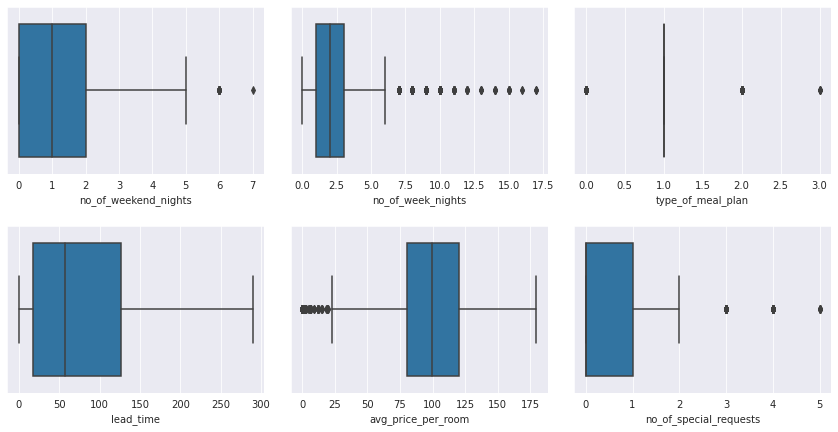

<IPython.core.display.Javascript object>

In [75]:
# Numerical variables
cols = X.select_dtypes(include=[int, float]).columns.tolist()[1:]
plt.figure(figsize=(12, 12))

for i, var in enumerate(cols):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(data=X, x=var)
  plt.tight_layout(pad=2)

plt.tight_layout(pad=2);
plt.show();

**Bivariate analysis**

**Correlation heatmap**

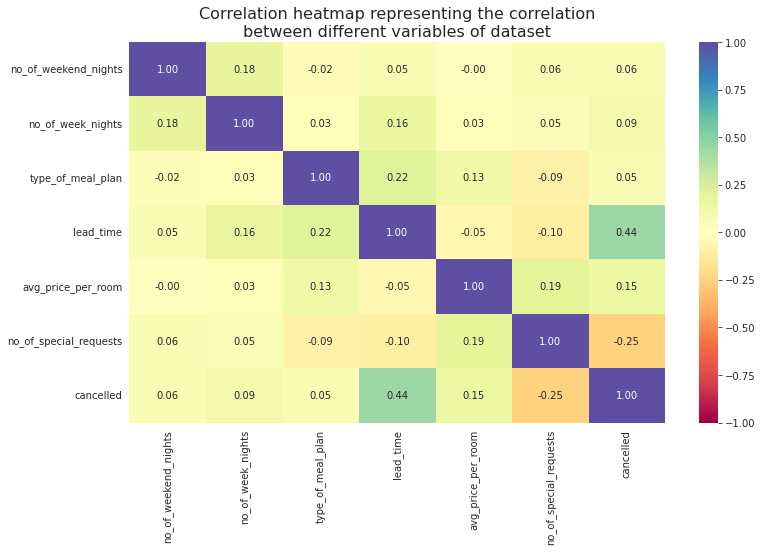

<IPython.core.display.Javascript object>

In [76]:
numeric = list(X.select_dtypes(include=[int, float]).columns[1:])

plt.figure(figsize=(12, 7))
sns.heatmap(pd.concat([X[numeric], y], axis=1).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xlabel('')
plt.ylabel('')
plt.title('Correlation heatmap representing the correlation\nbetween different variables of dataset', fontsize=16)
plt.show();

* Moderate positive correlation between the `lead_time` and the dependant variable
* Moderate negative correlation between the `no_of_special_requests` and the dependant variable
* Weak correlations between some independent variables - multicollinearity exists

**Pairplot**

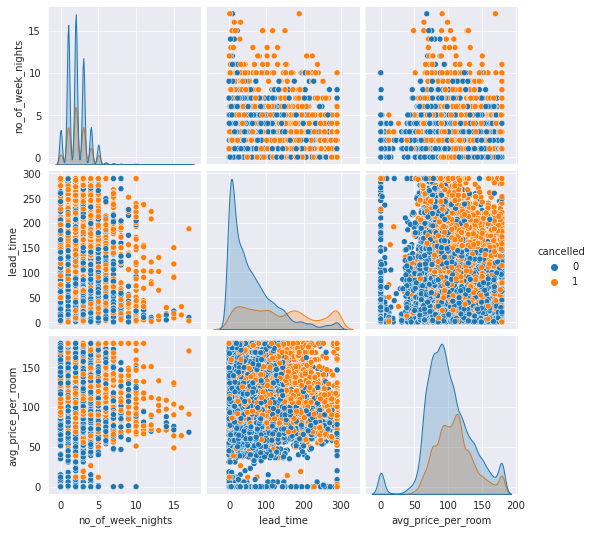

<IPython.core.display.Javascript object>

In [77]:
sns.pairplot(pd.concat([X[['no_of_week_nights', 'lead_time', 'avg_price_per_room']], y], axis=1), hue='cancelled');

* More expensive bookings and bookings with higher lead time cancel more often
* **After manipulating, the data look consistent**

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [78]:
# Outputting the VIF value for top-10 of all the variables

checking_vif(X).sort_values(by='VIF', ascending=False).head(10)

feature       VIF
0                               const 360.23873
32         market_segment_type_Online  68.92564
31        market_segment_type_Offline  62.07633
30      market_segment_type_Corporate  16.53643
26                   arrival_month_10   6.05903
25                    arrival_month_9   5.63316
24                    arrival_month_8   4.77618
29  market_segment_type_Complementary   4.38834
22                    arrival_month_6   4.11209
23                    arrival_month_7   3.93208

<IPython.core.display.Javascript object>

Multicollinearity exists in the dataset

* To make statistical inferences from a logistic regression model, it is essential to treat the dataset, remove columns cause multicollinearity, and ensure that there is no multicollinearity present in the final model data
* Some of the categorical levels of a variable have VIF>5 which can simply be ignored, but we will treat them also to simplify the model

# Building a Logistic Regression model

* We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

* Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [79]:
# fitting logistic regression model
lg = sm.Logit(y_train, X_train).fit(method='bfgs', disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25359
Method:                           MLE   Df Model:                           32
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3394
Time:                        05:44:39   Log-Likelihood:                -10630.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1708      0.286    -11.069      0.000      -3.732      -2.609
no_of_weekend_nights                  0.1019      0.020      5

<IPython.core.display.Javascript object>

**Observations**

* Negative values of the coefficient show that the probability of a booking being cancelled decreases with the increase of the corresponding attribute value.

* Positive values of the coefficient show that the probability of a booking being cancelled increases with the increase of the corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting that a booking was cancelled, but in reality, the booking was not cancelled.

2. Predicting that a booking was not cancelled, but in reality, the booking was cancelled.

**Which case is more important?** 

* Both the cases are important as:

  * If we predict a booking was cancelled, but  actually, the booking was not cancelled then overbooking may happened and the hotel might lose resources.

  * If we predict a a booking was not cancelled, but  actually, the booking was cancelled, then the hotel will incur costs due to room downtime.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* $F_1$ should be maximized as the greater the $F_1$, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * $F_1$ is computed as
  $$F_1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$$

**Functions to calculate different metrics and confusion matrix has been created so that we don't have to use the same code repeatedly for each model.**

* The `model_performance_classification_statsmodels` function will be used to check the model performance of models.
* The `confusion_matrix_statsmodels` function will be used to plot confusion matrix.

Training performance:


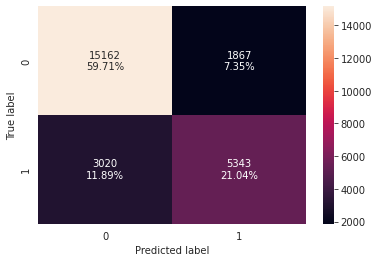

Accuracy  Recall  Precision      F1
0   0.80754 0.63889    0.74105 0.68619

<IPython.core.display.Javascript object>

In [80]:
print("Training performance:")
lg_train = model_performance(lg, X_train, y_train)

Testing performance:


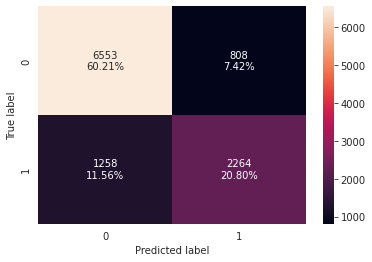

Accuracy  Recall  Precision      F1
0   0.81016 0.64282    0.73698 0.68668

<IPython.core.display.Javascript object>

In [81]:
print("Testing performance:")
lg_test = model_performance(lg, X_test, y_test)

**Observations**

* The $F_1$ of the model is ~0.69 and we will try to maximize it further

* The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Detecting and Dealing with Multicollinearity

In [82]:
# Outputting the VIF value for top-10 of all the variables
# Removing variables with high VIF

selected_features = mc_solving(lg_train, X_train, y_train)

print('\nSelected features are: ')
print(pd.Series(selected_features))


Iteration # 1


Accuracy  Recall  Precision      F1               feature to remove  \
1   0.80738 0.64451    0.73755 0.68789      market_segment_type_Online   
2   0.80632 0.64187    0.73625 0.68583     market_segment_type_Offline   
4   0.80734 0.63936    0.74027 0.68613                arrival_month_10   
0   0.80754 0.63889    0.74105 0.68619  -= Base model with all vars =-   
5   0.80707 0.63853    0.74002 0.68554                 arrival_month_9   
3   0.80612 0.63685    0.73849 0.68392   market_segment_type_Corporate   

       VIF  
1 70.70870  
2 63.64456  
4  5.97573  
0  0.00000  
5  5.59455  
3 16.91017


Column to remove [market_segment_type_Online]:
market_segment_type_Offline

Iteration # 2


Accuracy  Recall  Precision      F1               feature to remove     VIF
1   0.80687 0.64152    0.73786 0.68632                arrival_month_10 5.96690
2   0.80659 0.64080    0.73754 0.68578                 arrival_month_9 5.58753
0   0.80754 0.63889    0.74105 0.68619  -= Base model with all vars =- 0.00000


Column to remove [arrival_month_10]:
arrival_month_10

Multicollinearity in the dataset has been resolved.

Selected features are: 
0                                 const
1                  no_of_weekend_nights
2                     no_of_week_nights
3                     type_of_meal_plan
4            required_car_parking_space
5                             lead_time
6                        repeated_guest
7                    avg_price_per_room
8                no_of_special_requests
9                previous_cancellations
10                             children
11       room_type_reserved_Room_Type 2
12       room_type_reserved_Room_Type 3
13       room_type_reserved_Room_Type 4
14       room_type_reserved_Room_Type 5
15       room_type_reserved_Room_Type 6
16       room_type_reserved_Room_Type 7
17                    arrival_year_2018
18                      arrival_month_2
19                      arrival_month_3
20                      arrival_month_4
21                      arr

<IPython.core.display.Javascript object>

In [83]:
X_train1 = X_train.copy()[selected_features]
X_test1 = X_test.copy()[selected_features]

<IPython.core.display.Javascript object>

In [84]:
# fitting logistic regression model
lg1 = sm.Logit(y_train, X_train1).fit(disp=False, method='bfgs')
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25361
Method:                           MLE   Df Model:                           30
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3353
Time:                        05:44:59   Log-Likelihood:                -10697.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6478      0.110    -42.236      0.000      -4.864      -4.432
no_of_weekend_nights                  0.0871      0.020      4

<IPython.core.display.Javascript object>

Training performance:


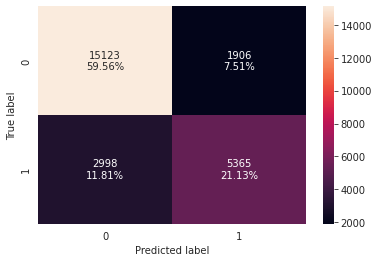

Accuracy  Recall  Precision      F1
0   0.80687 0.64152    0.73786 0.68632

<IPython.core.display.Javascript object>

In [85]:
print("Training performance:")
lg_train1 = model_performance(lg1, X_train1, y_train)

Testing performance:


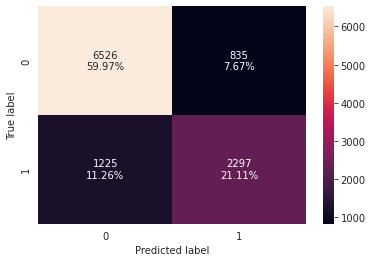

Accuracy  Recall  Precision      F1
0   0.81071 0.65219    0.73340 0.69041

<IPython.core.display.Javascript object>

In [86]:
print('Testing performance:')
lg_test1 = model_performance(lg1, X_test1, y_test)

## Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.

Note: *The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.*

In [87]:
selected_features = pv_solving(X_train1)

print('\nSelected features are: ')
print(pd.Series(selected_features))

Column `room_type_reserved_Room_Type 3` has been removed
Column `room_type_reserved_Room_Type 6` has been removed
Column `room_type_reserved_Room_Type 7` has been removed
Column `market_segment_type_Corporate` has been removed
Column `market_segment_type_Complementary` has been removed
Column `previous_cancellations` has been removed
Column `room_type_reserved_Room_Type 5` has been removed
Column `arrival_month_6` has been removed
Column `arrival_month_4` has been removed
Column `no_of_week_nights` has been removed

Selected features are: 
0                              const
1               no_of_weekend_nights
2                  type_of_meal_plan
3         required_car_parking_space
4                          lead_time
5                     repeated_guest
6                 avg_price_per_room
7             no_of_special_requests
8                           children
9     room_type_reserved_Room_Type 2
10    room_type_reserved_Room_Type 4
11                 arrival_year_2018
12        

<IPython.core.display.Javascript object>

In [88]:
X_train2 = X_train1.copy()[selected_features]
X_test2 = X_test1.copy()[selected_features]

<IPython.core.display.Javascript object>

In [89]:
lg2 = sm.Logit(y_train, X_train2).fit(disp=False, method='bfgs')
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3349
Time:                        05:45:02   Log-Likelihood:                -10703.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.8021      0.104    -46.206      0.000      -5.006      -4.598
no_of_weekend_nights               0.1238      0.020      6.264      0.

<IPython.core.display.Javascript object>

Training performance:


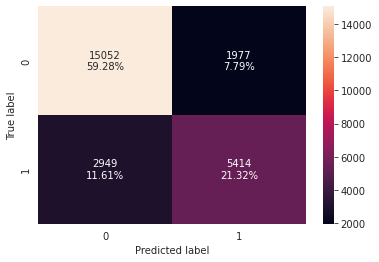

Accuracy  Recall  Precision      F1
0   0.80600 0.64738    0.73251 0.68732

<IPython.core.display.Javascript object>

In [90]:
print('Training performance:')
lg_train2 = model_performance(lg2, X_train2, y_train)


Testing performance:


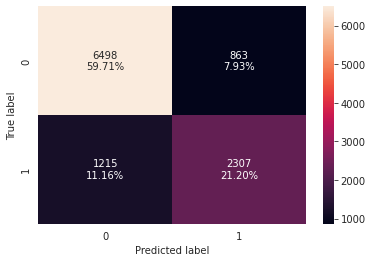

Accuracy  Recall  Precision      F1
0   0.80906 0.65503    0.72776 0.68948

<IPython.core.display.Javascript object>

In [91]:
print('\nTesting performance:')
lg_test2 = model_performance(lg2, X_test2, y_test)

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

## Checking Assumptions of Logistic Regression

**1. The Response Variable is Binary**

Logistic regression assumes that the response variable only takes on two possible outcomes.

In [92]:
y.value_counts()

cancelled
0            24390
1            11885
dtype: int64

<IPython.core.display.Javascript object>

In [93]:
y.value_counts(normalize=True)

cancelled
0           0.67236
1           0.32764
dtype: float64

<IPython.core.display.Javascript object>

>**Yes**, the response variable is binary:
  * Booking status `cancelled` is **0** (booking is not cancelled)
  * Booking status `cancelled` is **1** (booking is cancelled)



**2. There is No Multicollinearity Among Explanatory Variables**

Logistic regression assumes that there is no severe multicollinearity among the explanatory variables.

Multicollinearity occurs when two or more explanatory variables are highly correlated to each other, such that they do not provide unique or independent information in the regression model. If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the model.

> **Yes**, there is no multicollinearity among explanatory bariables
The multicollinearity was detect and treated by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model.
See section `Detecting and Dealing with Multicollinearity` above.

**3. There are No Extreme Outliers**
Logistic regression assumes that there are no extreme outliers or influential observations in the dataset.

We decided to keep the outliers in the model as they are proper values

> **Yes**, there are no extreme outliers. See section `Outlier detection and treatment` above

**5. There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable**

Logistic regression assumes that there exists a linear relationship between each explanatory variable and the logit of the response variable. Recall that the logit is defined as:

$$logit(p)  = \log(\frac{p}{1-p}),$$ where $p$ is the probability of a positive outcome.

How to check this assumption: The easiest way to see if this assumption is met is to use a Box-Tidwell test.

In [94]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

dflog = df.copy()

dflog['lead_time_log'] = dflog['lead_time'] * np.log1p(dflog['lead_time'])
dflog['no_of_special_requests_log'] = dflog['no_of_special_requests'] * np.log1p(dflog['no_of_special_requests'])
dflog['avg_price_per_room_log'] = dflog['avg_price_per_room'] * np.log1p(dflog['avg_price_per_room'])
dflog['type_of_meal_plan_log'] = dflog['type_of_meal_plan'] * np.log1p(dflog['type_of_meal_plan'])

cols_to_keep = ['lead_time', 
                'no_of_special_requests', 
                'type_of_meal_plan',
                'avg_price_per_room', 
                'lead_time_log', 
                'no_of_special_requests_log', 
                'avg_price_per_room_log',
                'type_of_meal_plan_log'
                ]

X_ = sm.add_constant(dflog[cols_to_keep])
y_ = y
 
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_, X_, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              cancelled   No. Observations:                36275
Model:                            GLM   Df Residuals:                    36266
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16696.
Date:                Sat, 18 Mar 2023   Deviance:                       33393.
Time:                        05:45:03   Pearson chi2:                 3.70e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2914
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<IPython.core.display.Javascript object>

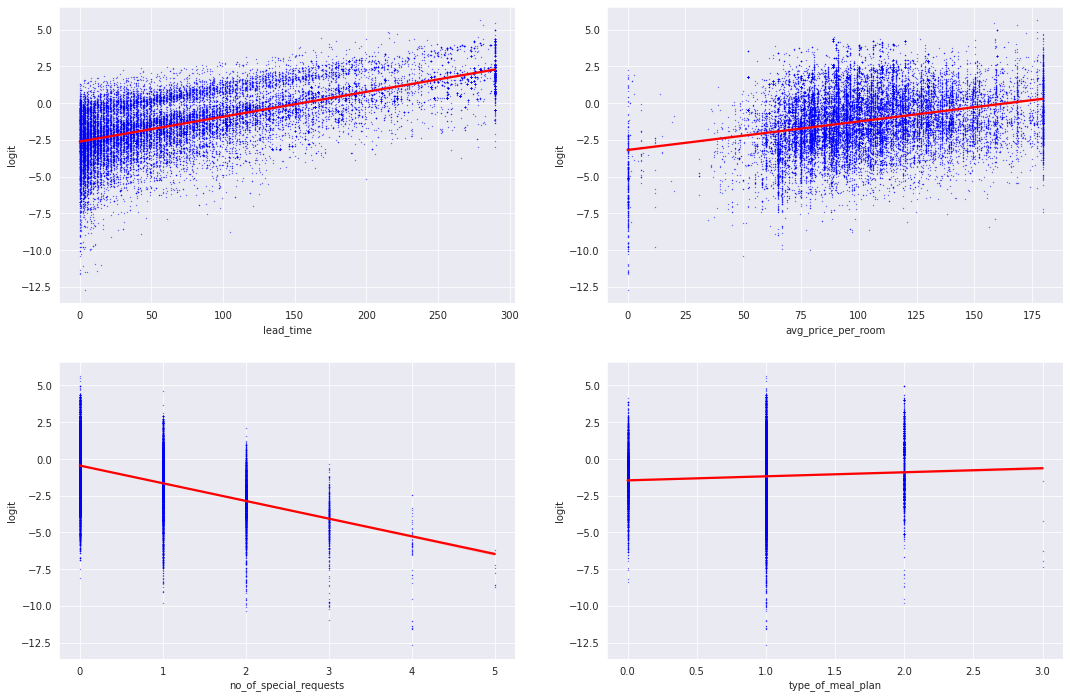

<IPython.core.display.Javascript object>

In [95]:
hh = pd.DataFrame()

hh['logit'] = np.log(lg2.predict(X_train2)/(1-lg2.predict(X_train2)))
hh['lead_time'] = X_train2['lead_time']
hh['avg_price_per_room'] = X_train2['avg_price_per_room']
hh['no_of_special_requests'] = X_train2['no_of_special_requests']
hh['type_of_meal_plan'] = X_train2['type_of_meal_plan']

fig, ax = plt.subplots(2, 2, figsize=(18, 12))
sns.regplot(data=hh, x='lead_time', y='logit', marker='o', scatter_kws={'s':0.1, 'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0,0])
sns.regplot(data=hh, x='avg_price_per_room', y='logit', marker='o', scatter_kws={'s':0.1, 'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0,1])
sns.regplot(data=hh, x='no_of_special_requests', y='logit', marker='o', scatter_kws={'s':0.1, 'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[1,0])
sns.regplot(data=hh, x='type_of_meal_plan', y='logit', marker='o', scatter_kws={'s':0.1, 'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[1,1])
plt.show();

> **Yes**. According to the Box-Tidwell test, the relationships between the explanatory variables and the Logit of the response variables are not linear for all the explanatory variables. However, visually, the relationships are close to linear. We will take this into account when we make conclusions about the coefficients' interpretations.

**6. The Sample Size is Sufficiently Large**

Logistic regression assumes that the sample size of the dataset if large enough to draw valid conclusions from the fitted logistic regression model.


> **Yes**, the sample size is sufficiently large.
As a rule of thumb, we should have a minimum of 10 cases with the least frequent outcome for each explanatory variable. 
We have 33 explanatory variables, and the expected probability of the least frequent outcome is 0.33. Then we should have a sample size of at least (10*33) / 0.33 = 1000. 1000 is less than the number of rows in our dataset

## Interpretations based on coefficients obtained from the logistic regression model

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $\log(odds)$ and to find the odds,<br>we have to take the exponential of the coefficients
* Therefore, **$odds = e^\beta$**
* The percentage change in odds is given as $(e^\beta - 1) * 100$

In [96]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns)

Odds  Change_odd%
const                          0.00821    -99.17876
no_of_weekend_nights           1.13180     13.17971
type_of_meal_plan              0.88977    -11.02331
required_car_parking_space     0.32482    -67.51789
lead_time                      1.01729      1.72904
repeated_guest                 0.51637    -48.36335
avg_price_per_room             1.01870      1.87032
no_of_special_requests         0.21329    -78.67147
children                       1.36401     36.40118
room_type_reserved_Room_Type 2 0.77434    -22.56621
room_type_reserved_Room_Type 4 0.84229    -15.77127
arrival_year_2018              1.52214     52.21364
arrival_month_2                1.59900     59.89972
arrival_month_3                1.50504     50.50376
arrival_month_5                0.74351    -25.64883
arrival_month_7                0.79173    -20.82733
arrival_month_8                0.76823    -23.17672
arrival_month_9                0.78894    -21.10600
arrival_month_11               1.44793     44.79255
arrival_month_12               0.14556    -85.44395
market_segment_type_Online     5.81345    481.34480

<IPython.core.display.Javascript object>

**Coefficient interpretations**

* `children`: The odds of cancelation of a booking with child(ren) are 1.36 times more than a booking for adults only (**36% increase** in the odds of the booking being canceled), holding all other features constant.

* `required_car_parking_space`: The odds of cancelation of a booking with a requirement of a car parking space are 3 times (1/0.32) less than for a booking without such requirement (**68% fewer** odds of the booking being canceled), holding all other features constant.

* `repeated_guest`: The odds of cancelation of a booking for a repeated guest are 2.00 times (1/0.52) less than for a booking for a new customer (**48% fewer** odds of the booking being canceled), holding all other features constant.

*  `arrival_year`
  * `arrival_year_2018`: The odds of cancelation of a booking with an arrival date in 2018 are 1.52 times more than for a booking with an arrival date in 2017 (**52% increase** in the odds of the booking being canceled), holding all other features constant.<br>*The dropped category `arrival_year_2017` is taken as a reference level.*

* `market_segment_type`: 
  * `market_segment_type_Online`: The odds of cancelation of a booking comes from the `Online` market segment type are 5.81 times more than for a booking comes from another segment (**481% increase** in the odds of the booking being canceled), holding all other features constant.<br>*The dropped categories `Aviation`, `Complementary`, and `Offline` are taken as a reference level.*

* `no_of_weekend_nights`: Holding all other features constant 1 unit increase (1 night) in `no_of_weekend_nights` will increase the odds of a booking being canceled by 1.13 times (**13% increase**).

* `no_of_special_requests`: Holding all other features constant 1 unit increase (1 request) in `no_of_special_requests` will decrease the odds of a booking being canceled by 4.69 (1/0.21) times (**79% decrease**).

* `avg_price_per_room`: Holding all other features constant, 1 unit increase (1 euro) in `avg_price_per_room` will increase the odds of a booking being canceled by ~1.02 times (**2% increase**).
<br>**NB:** *Since a linear relationship between the explanatory variable `avg_price_per_room` and the Logit of the response variable `booking_status` has not been confirmed using the Box-Tidwell test, the interpretation may be incorrect.*

* `lead_time`: Holding all other features constant, 1 unit increase (1 day) in `lead_time` will increase the odds of a booking being canceled by ~1.02 times (**2% increase**).
<br>**NB:** *Since a linear relationship between the explanatory variable `lead_time` and the Logit of the response variable `booking_status` has not been confirmed using the Box-Tidwell test, the interpretation may be incorrect.*

* `type_of_meal_plan`: Holding all other features constant, 1 unit increase (1 meal time) in `type_of_meal_plan` will decrease the odds of a booking being canceled by ~1.12 (1/0.89) times (**11% decrease**).
<br>**NB:** *Since a linear relationship between the explanatory variable `type_of_meal_plan` and the Logit of the response variable `booking_status` has not been confirmed using the Box-Tidwell test, the interpretation may be incorrect.*

* `room_type_reserved`: 
  * `room_type_reserved_Room_Type 2`: The odds of a booking with `Room_Type 2` being canceled is 1.29 (1/0.77) times less than the booking with selected `Room_Type 1, 3, 5, 6, or 7` (**23% decrease**), holding all other features constant.
  * `room_type_reserved_Room_Type 4`: The odds of a booking with `Room_Type 4` being canceled is 1.19 (1/0.84) times less than the booking with selected `Room_Type 1, 3, 5, 6, or 7` (**16% decrease**), holding all other features constant.<br>*The dropped categories `Room_Type 1`, `Room_Type 3`, `Room_Type 5`, `Room_Type 6` and `Room_Type 7` are taken as a reference level.*

* `arrival_month`:
  * The odds of a booking with an arrival date in Feb, Mar, and Nov being canceled is **more** than the booking with an arrival in Jan, Apr, Jun, or Oct, holding all other features constant.
    * `arrival_month_2`: 1.60 times or 60% more;
    * `arrival_month_3`: 1.51 times or 51% more;
    * `arrival_month_11`: 1.45 times or 45% more;
  * The odds of a booking with an arrival date in May-Sep and Dec being canceled is **less** than the booking with an arrival in Jan, Apr, Jun, or Oct, holding all other features constant.
    * `arrival_month_5`: 1.34 (1/0.74) times or 26% less;
    * `arrival_month_7`: 1.26 (1/0.79) times or 21% less;
    * `arrival_month_8`: 1.30 (1/0.77) times or 23% less;
    * `arrival_month_9`: 1.27 (1/0.79) times or 21% less;
    * `arrival_month_12`: 6.87 (1/0.15) times or 85% less.
<br>*The dropped categories `January`, `April`, 'June` and `October` are taken as a reference level.*


## Checking performance of the new model

**Training set performance**

In [97]:
print("Training performance:")
lg_train2

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.64738    0.73251 0.68732

<IPython.core.display.Javascript object>

**Testing set performance**

In [98]:
print("Test performance:")
lg_test2

Test performance:


Accuracy  Recall  Precision      F1
0   0.80906 0.65503    0.72776 0.68948

<IPython.core.display.Javascript object>

* The model is giving a good $F_1$ score of ~0.68732 and ~0.68948 on the train and test sets respectively
* As the train and test performances are comparable, the model is not overfitting
* Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the $F_1$ score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is $F_1$ score

### ROC Curve and ROC-AUC

**ROC-AUC on training set**

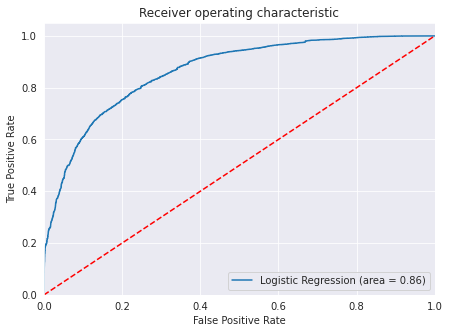

<IPython.core.display.Javascript object>

In [99]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
* ROC-AUC score of 0.86 on training is good.

### Optimal threshold using AUC-ROC curve

In [100]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f'Optimal threshold AUC-ROC: {optimal_threshold_auc_roc:.5f}')

Optimal threshold AUC-ROC: 0.32799


<IPython.core.display.Javascript object>

**Checking model performance on training set**

Training performance:


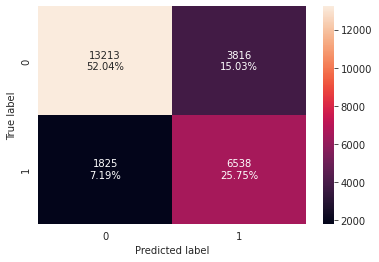

Accuracy  Recall  Precision      F1
0   0.77784 0.78178    0.63145 0.69862

<IPython.core.display.Javascript object>

In [101]:
# checking model performance for this model
print("Training performance:")
lg_train_auc_roc = model_performance(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

* Accuracy of model has reduced but the other metrics have increased.
* The model is still giving a good performance.

**Checking model performance on test set**

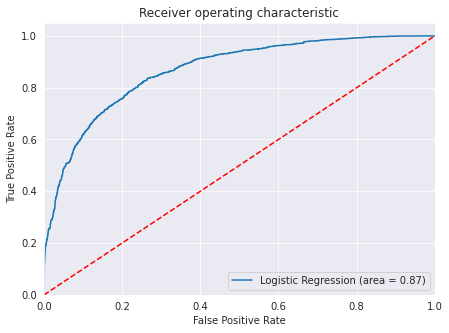

<IPython.core.display.Javascript object>

In [102]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on testing set.
* ROC-AUC score of 0.87 on testing is slightly higher than on training.

Test performance:


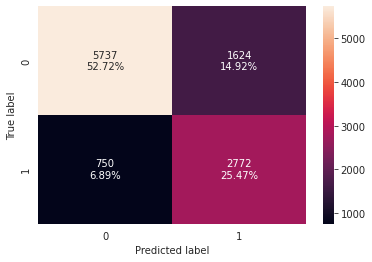

Accuracy  Recall  Precision      F1
0   0.78186 0.78705    0.63057 0.70018

<IPython.core.display.Javascript object>

In [103]:
# checking model performance for this model
print("Test performance:")
lg_test_auc_roc = model_performance(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)


* Accuracy of model has reduced but the other metrics have increased.
* The model is still giving a good performance on testing.

**Let's use Precision-Recall curve and see if we can find a better threshold**


###Precision-Recall Curve

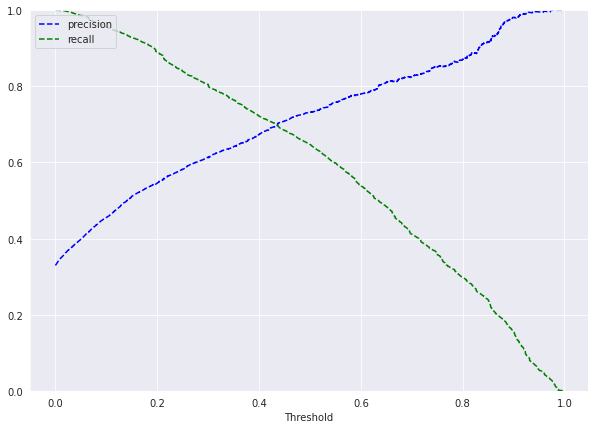

<IPython.core.display.Javascript object>

In [104]:
y_scores = lg2.predict(X_train2)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.figure(figsize=(10, 7))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show();

In [105]:
tmp = pd.DataFrame(data={'Threshold': thresholds, 'Precision': precisions[:-1], 'Recall': recalls[:-1]})
tmp['diff'] = abs(tmp['Precision'] - tmp['Recall'])
tmp[tmp['diff']==0]

Threshold  Precision  Recall    diff
12760    0.43542    0.69772 0.69772 0.00000

<IPython.core.display.Javascript object>

In [106]:
optimal_threshold_curve = tmp[tmp['diff']==0]['Threshold'].values[0]
optimal_threshold_curve

0.4354191129890816

<IPython.core.display.Javascript object>

* At the threshold of 0.43542, we get balanced recall and precision.

**Checking model performance on training set**

Training performance:


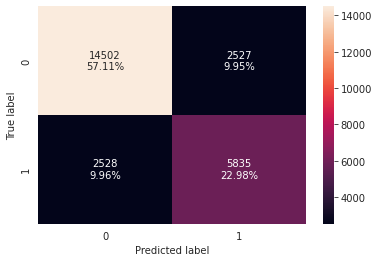

Accuracy  Recall  Precision      F1
0   0.80092 0.69772    0.69780 0.69776

<IPython.core.display.Javascript object>

In [107]:
print("Training performance:")
lg_train_pr_curve = model_performance(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

* Model is performing well on training set.
* There is some improvements in the model performance as the default threshold is 0.50 and here we get 0.44 as the optimal threshold.
* Model has given a balanced performance in terms of precision and recall.

**Checking model performance on test set**

Test performance:


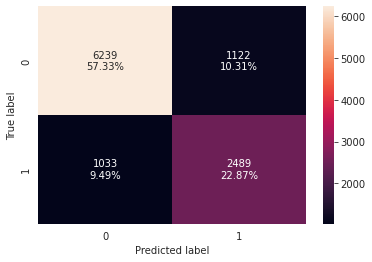

Accuracy  Recall  Precision      F1
0   0.80198 0.70670    0.68928 0.69788

<IPython.core.display.Javascript object>

In [108]:
print("Test performance:")
lg_test_pr_curve = model_performance(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

* Model is performing well on test set.
* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

## Final Model Summary

### Model Performance Comparison and Final Model Selection

In [109]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lg_train.T, lg_train1.T, lg_train2.T, lg_train_auc_roc.T, lg_train_pr_curve.T,], axis=1)

models_train_comp_df.columns = \
  ["LR", "LR-mc", "LR-pv",
   f"LR-{optimal_threshold_auc_roc:.2f}", 
   f"LR-{optimal_threshold_curve:.2f}"]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy  Recall  Precision      F1
LR        0.80754 0.63889    0.74105 0.68619
LR-mc     0.80687 0.64152    0.73786 0.68632
LR-pv     0.80600 0.64738    0.73251 0.68732
LR-0.33   0.77784 0.78178    0.63145 0.69862
LR-0.44   0.80092 0.69772    0.69780 0.69776

<IPython.core.display.Javascript object>

In [110]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [lg_test.T, lg_test1.T, lg_test2.T, lg_test_auc_roc.T, lg_test_pr_curve.T,], axis=1)

models_test_comp_df.columns = \
  ["LR", "LR-mc", "LR-pv",
   f"LR-{optimal_threshold_auc_roc:.2f}", 
   f"LR-{optimal_threshold_curve:.2f}"]

print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision      F1
LR        0.81016 0.64282    0.73698 0.68668
LR-mc     0.81071 0.65219    0.73340 0.69041
LR-pv     0.80906 0.65503    0.72776 0.68948
LR-0.33   0.78186 0.78705    0.63057 0.70018
LR-0.44   0.80198 0.70670    0.68928 0.69788

<IPython.core.display.Javascript object>

* Almost all the three models are performing well on both training and test data without the problem of overfitting
* The model with threshold of **0.33** is giving the best $F_1$ score **0.70** on testing data. Therefore it can be selected as the final model

###Final Model

Final model performance on test data:


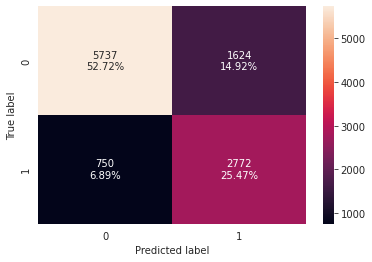

Accuracy  Recall  Precision      F1
0   0.78186 0.78705    0.63057 0.70018

<IPython.core.display.Javascript object>

In [111]:
final_model = sm.Logit(y_train, X_train2).fit(method='bfgs', disp=False)

print("Final model performance on test data:")
final_model_performance = model_performance(final_model, X_test2, y_test, threshold=optimal_threshold_auc_roc)


In [112]:
y_test_preidct = round(final_model.predict(X_test2) > optimal_threshold_auc_roc)
print(f'Final model Recall on test data is {recall_score(y_test, y_test_preidct):.5f}')
print(f'Final model Precisison on test data is {precision_score(y_test, y_test_preidct):.5f}')
print(f'Final model F1 score on test data is {f1_score(y_test, y_test_preidct):.5f}')

Final model Recall on test data is 0.78705
Final model Precisison on test data is 0.63057
Final model F1 score on test data is 0.70018


<IPython.core.display.Javascript object>

**Observations from Logistic Regression model**

* We have been able to build a predictive model that can predict which booking is going to be canceled in advance with an $F_1$ score of **0.69862** on the training data set. The model can help the hotel staff in formulating profitable policies for cancellations and refunds.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficients of continuous variables such as the number of weekend nights, lead time, and the average price per room, are positive and increase in these will lead to an increase in the chances of a booking being canceled.

* Coefficients of categorical binary variables such as the presence of children among the guests, and arrival in February, March, or November are also positive and 1s in these will lead to an increase in chances of a booking being canceled.

* Coefficients of continuous variables such as the number of meals (type_of_meal_plan), number of special requests are negative and increase in these will lead to decrease in the chances of a booking being canceled.

* Coefficients of categorical binary variables such as repeated guest, car parking space requirement, reservation of Room_Type 2 and Room_Type 4, and arrival from May to September or December are also negatibe and 1s in these will lead to decrease in chances of a booking being canceled.

* Using the **default** threshold the model gives a low recall but good precision score. This model maximizes True Positives and minimizes False Positives. We can permit some False Positives as our goal is to predict all Positives.

* Using a **0.33** threshold the model gives a high recall but lower precision score. This model maximizes True Positive and minimizes False Negative. It catches maximum Positive cases. And this is what we are focusiog on in this project.

# Building a Decision Tree model

In [113]:
X = df.drop(['booking_status'], axis=1)
y = round(df['booking_status'] == 'Canceled')

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

<IPython.core.display.Javascript object>

In [114]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<IPython.core.display.Javascript object>

###Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**


* Predicting that a booking will not be canceled but in reality, the booking will be canceled (FN)
* Predicting that a booking will be canceled but in reality, the booking will not be canceled (FP)

**Which case is more important?**

* If we predict that a booking will not be canceled but in reality, the booking will be canceled, then the hotel will receive less revenue/profit

* If we predict that a booking will be canceled but in reality, the booking will not be canceled, then the hotel may face problems of overbooking and bear additional expenses to accommodate guests in another hotel for example

**How to reduce the losses?**

* We want the recall to be maximized, the greater the recall score higher are the chances of minimizing the False Negatives.

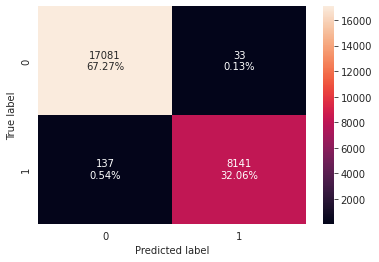

Accuracy  Recall  Precision      F1
0   0.99330 0.98345    0.99596 0.98967

<IPython.core.display.Javascript object>

In [115]:
dt_train = model_performance(model, X_train, y_train)

* Model is able to perfectly classify all the data points on the training set.
* Almost no errors on the training set, each sample has been classified correctly
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.
* To verify if the model is overfitting, we need to check the performance on test set

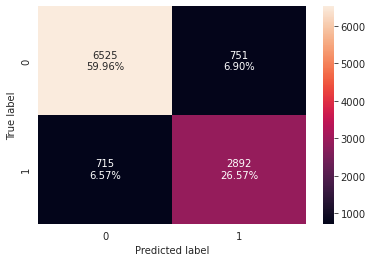

Accuracy  Recall  Precision      F1
0   0.86529 0.80177    0.79385 0.79779

<IPython.core.display.Javascript object>

In [116]:
dt_test = model_performance(model, X_test, y_test)

* The model is overfitting the data as expected and not able to generalize well on the test set
* However all the performance metrics are better than in Logistic Regression model

<IPython.core.display.Javascript object>

**Visualizing the Decision Tree**

In [117]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

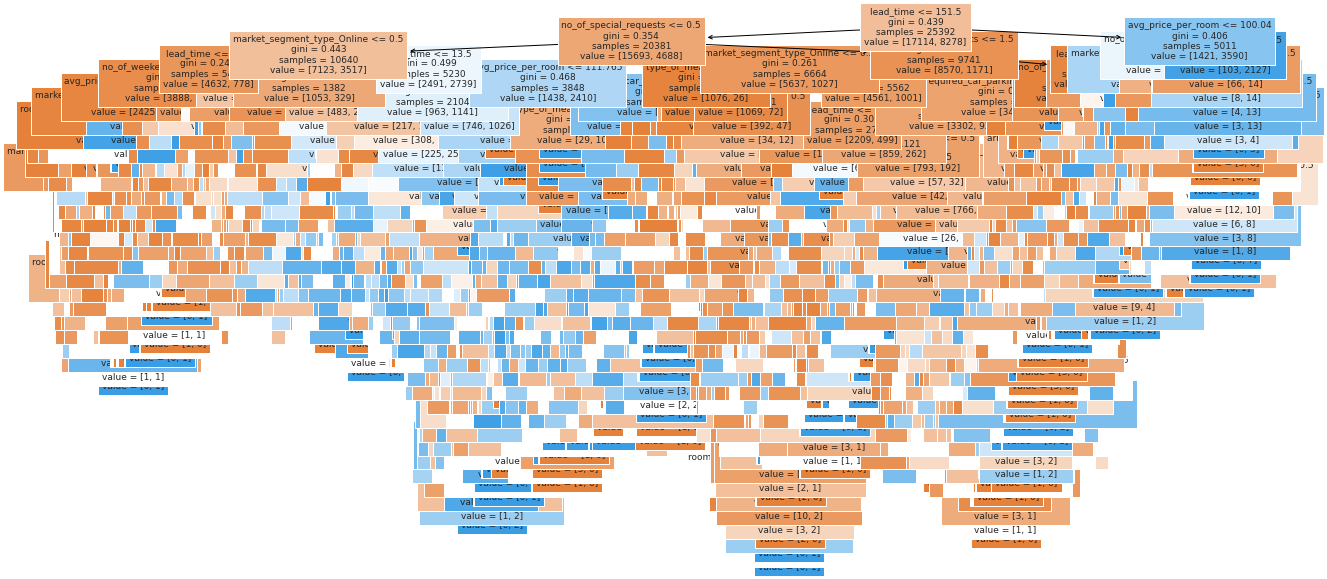

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


**Do we need to prune the tree?**

**Yes**, let's use pruning techniques to try and reduce overfitting.

### Decision Tree (Pre-pruning)

**Before pruning the tree let's check the important features.**

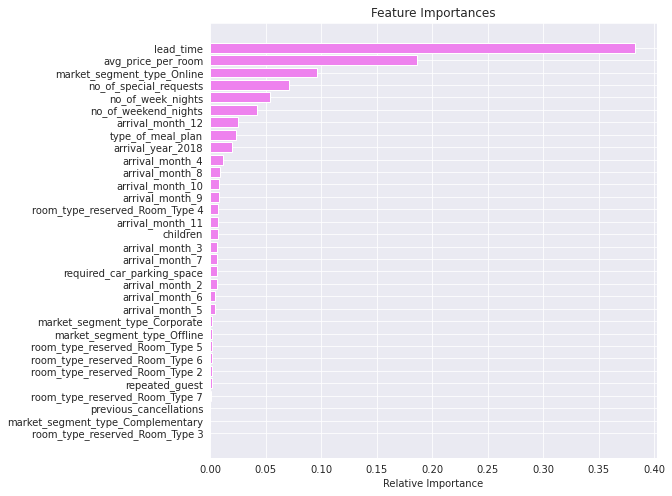

<IPython.core.display.Javascript object>

In [119]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of our model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [120]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(4, 8, 2),
    "max_leaf_nodes": [25, 50, 75],
    "min_samples_split": [5, 10, 20],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [1e-5, 1e-4],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50,
                       min_impurity_decrease=1e-05, min_samples_split=20,
                       random_state=42)

<IPython.core.display.Javascript object>

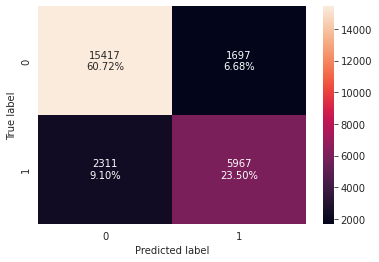

Accuracy  Recall  Precision      F1
0   0.84216 0.72083    0.77858 0.74859

<IPython.core.display.Javascript object>

In [121]:
dt_train_pre = model_performance(estimator, X_train, y_train)

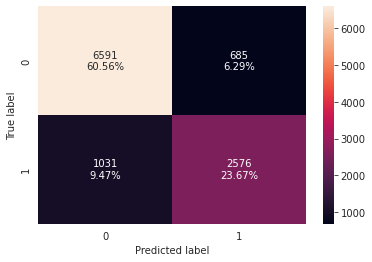

Accuracy  Recall  Precision      F1
0   0.84232 0.71417    0.78994 0.75015

<IPython.core.display.Javascript object>

In [122]:
dt_test_pre = model_performance(estimator, X_test, y_test)

* The model is giving a generalized result now.
* The $F_1$ scores on both the train and test data are coming to be around 0.75 which shows that the model is able to generalize well on unseen data.

**Visualizing the Decision Tree**

In [123]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

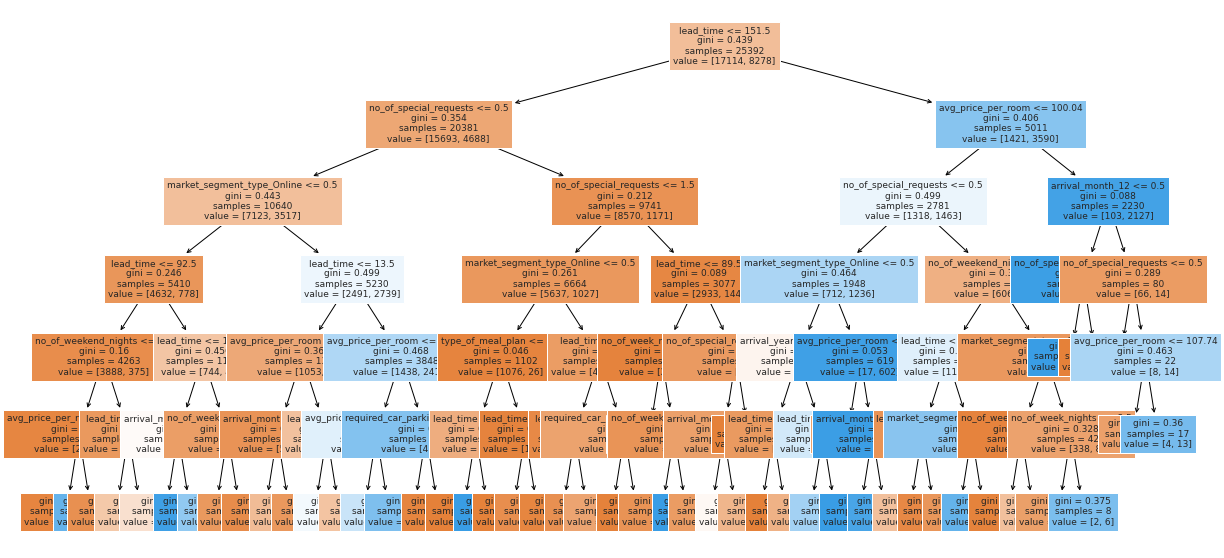

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [125]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |   |--- weights: [2421.00, 84.00] class: 0.0
|   |   |   |   |   |--- avg_price_per_room >  178.44
|   |   |   |   |   |   |--- weights: [4.00, 18.00] class: 1.0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [1250.00, 152.00] class: 0.0
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [213.00, 121.00] class: 0.0
|   |   |   |--- lead_time >  92.50
|   |   |   |   |--- lead_time <= 116.50
|   |   |   |   |   |--- arrival_month_4 <= 0.50
|   |   |   |   |   |   |--- weights: [316.00, 239.00] class: 0.0
|   |   |   |   |   |--- arrival_month_4 >  0.50
|   |   |   |   |   |   |--- weights: [2.00, 67.00] 

<IPython.core.display.Javascript object>

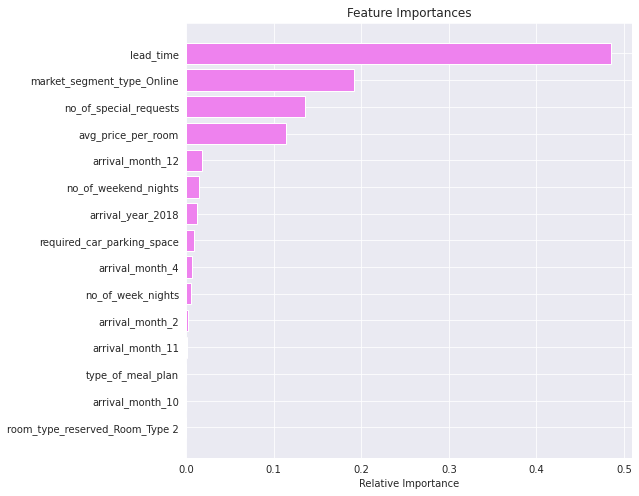

<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead time and Online segment are the most important features.

**Observations from the pre-pruned decision tree**
* The tree become more simple, number of nodes and branches decreased significantly
* The performance metrics of the model has been generalized.
* The most important features are:
  * Lead time
  * Market Segment - Online
  * Number of special requests
  * Average price per room
  * Arrivak month - December
* The rules obtained from the decision tree can be interpreted as:
  * The lead time is the most important factor of the booking cancelation located in the root
  * if lead time < 152 days and no special requests and not Online:
    * if lead time < 93 and weekdays only 
      * if price is more 178.44 then the booking will be canceled
      * if price is less or equal to 178.44 then the booking will not be canceled

<code>
    --- lead_time <= 151.50<br>
    |   |--- no_of_special_requests <= 0.50<br>
    |   |   |--- market_segment_type_Online <= 0.50<br>
    |   |   |   |--- lead_time <= 92.50<br>
    |   |   |   |   |--- no_of_weekend_nights <= 0.50<br>
    |   |   |   |   |   |--- avg_price_per_room <= 178.44<br>
    |   |   |   |   |   |   |--- weights: [2421.00, 84.00] class: 0.0<br>
    |   |   |   |   |   |--- avg_price_per_room >  178.44<br>
    |   |   |   |   |   |   |--- weights: [4.00, 18.00] class: 1.0<br>
</code>

and so on we can go through each of the branches.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

**Cost Ccomplexity Pruning**

In [127]:
clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [128]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00975
1        0.00000     0.00975
2        0.00000     0.00975
3        0.00000     0.00975
4        0.00000     0.00975
...          ...         ...
1632     0.00904     0.32867
1633     0.01017     0.33884
1634     0.01199     0.35084
1635     0.03448     0.41979
1636     0.08021     0.50000

[1637 rows x 2 columns]

<IPython.core.display.Javascript object>

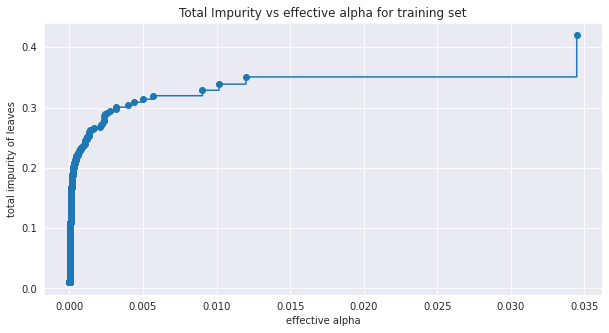

<IPython.core.display.Javascript object>

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

In [130]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(f'Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]:.5f}')


Number of nodes in the last tree is: 1 with ccp_alpha: 0.08021


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

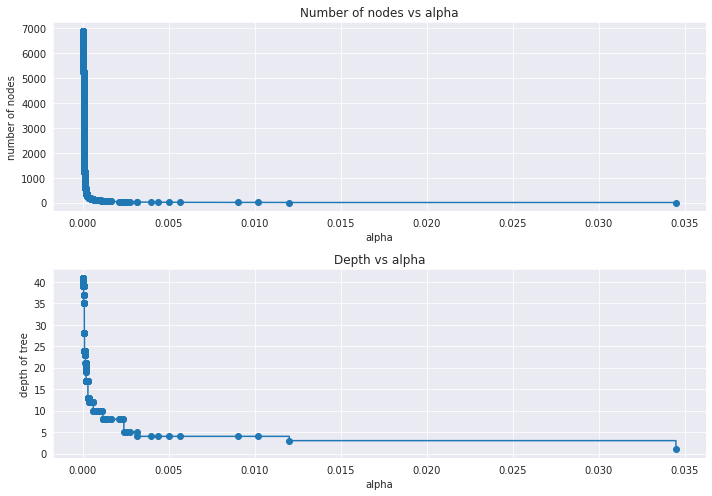

<IPython.core.display.Javascript object>

In [131]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [132]:
f1_train, f1_test = [], []
train_scores, test_scores = [], []

for clf in clfs:
  pred_train, pred_test = clf.predict(X_train), clf.predict(X_test)
  values_train, values_test = f1_score(y_train, pred_train), f1_score(y_test, pred_test)
  f1_train.append(values_train)
  f1_test.append(values_test)
  train_scores.append(clf.score(X_train, y_train))
  test_scores.append(clf.score(X_test, y_test))

<IPython.core.display.Javascript object>

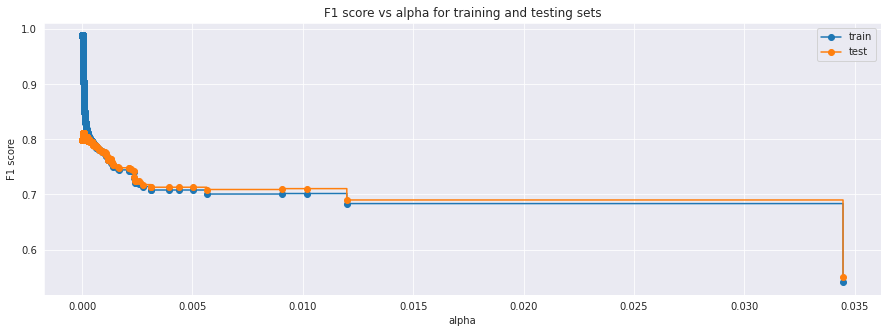

<IPython.core.display.Javascript object>

In [133]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [134]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=6.192049136120569e-05, class_weight='balanced',
                       random_state=42)


<IPython.core.display.Javascript object>

**Checking performance on training set**

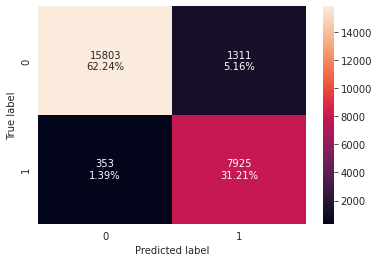

Accuracy  Recall  Precision      F1
0   0.93447 0.95736    0.85806 0.90499

<IPython.core.display.Javascript object>

In [135]:
dt_train_post = model_performance(best_model, X_train, y_train)

**Checking performance on testing set**

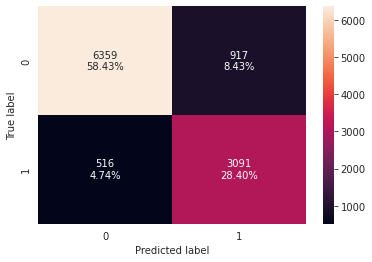

Accuracy  Recall  Precision      F1
0   0.86833 0.85694    0.77121 0.81182

<IPython.core.display.Javascript object>

In [136]:
dt_test_post = model_performance(best_model, X_test, y_test)


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around **0.90** which shows that the model is able to generalize well on unseen data.

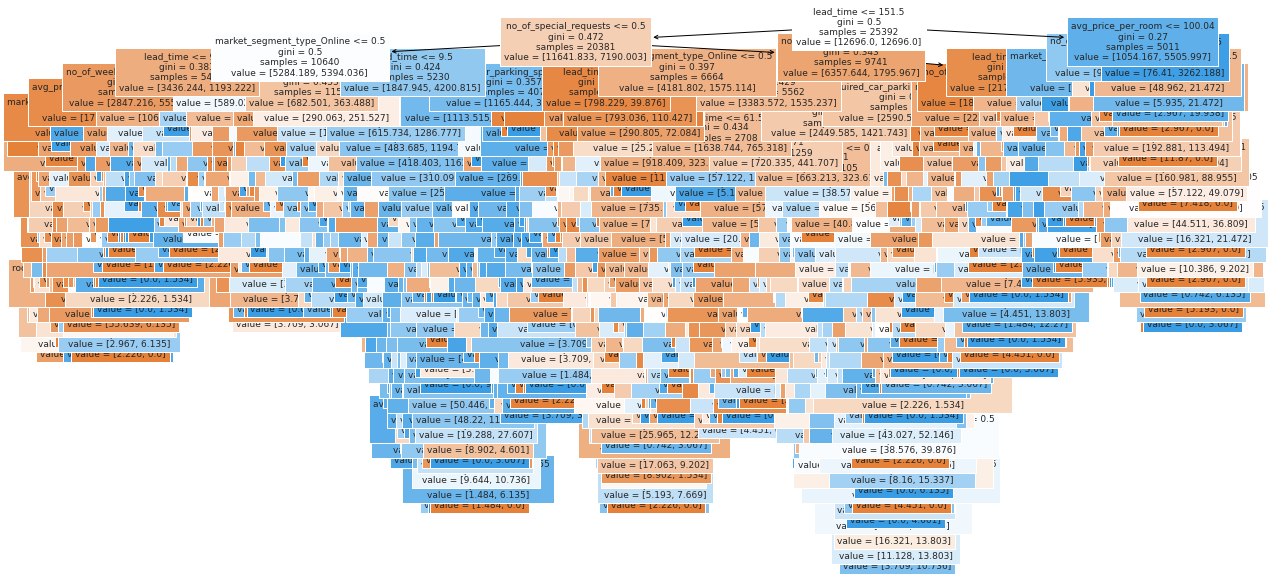

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [138]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 107.00
|   |   |   |   |   |   |   |   |   |--- weights: [78.64, 1.53] class: 0.0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  107.00
|   |   |   |   |   |   |   |   |   |--- weights: [5.19, 6.13] class: 1.0
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1238.89, 0.00] class: 0.0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

<IPython.core.display.Javascript object>

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [139]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[-15:]

<IPython.core.display.Javascript object>

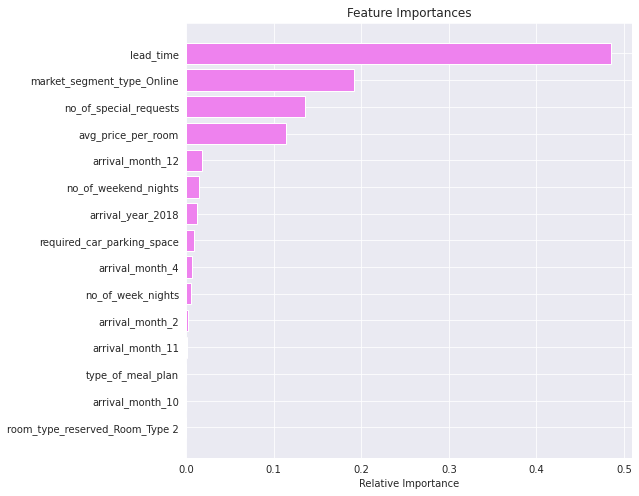

<IPython.core.display.Javascript object>

In [140]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The feature importance is similar to what we got in pre-pruned tree.
* The lead time, average room price, market segment type `Online`, and no of special requests are the most important features for the post-pruned tree


## Model Performance Comparison and Conclusions

### Comparison of Models and Final Model Selection

In [141]:
# training performance comparison

models_train_comp_df = pd.concat([dt_train.T, dt_train_pre.T, dt_train_post.T], axis=1)
models_train_comp_df.columns = ["Decision Tree", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy  Recall  Precision      F1
Decision Tree                  0.99330 0.98345    0.99596 0.98967
Decision Tree (Pre-Pruning)    0.84216 0.72083    0.77858 0.74859
Decision Tree (Post-Pruning)   0.93447 0.95736    0.85806 0.90499

<IPython.core.display.Javascript object>

In [142]:
# testing performance comparison

models_test_comp_df = pd.concat([dt_test.T, dt_test_pre.T, dt_test_post.T], axis=1)
models_test_comp_df.columns = ["Decision Tree", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision      F1
Decision Tree                  0.86529 0.80177    0.79385 0.79779
Decision Tree (Pre-Pruning)    0.84232 0.71417    0.78994 0.75015
Decision Tree (Post-Pruning)   0.86833 0.85694    0.77121 0.81182

<IPython.core.display.Javascript object>

* The post-pruned Decision tree model demonstrates good improvements in Recall and F1 score with a slight decline in Precision metric
* We choose the post-pruned decision tree as the best model since it gives higher scores on the train and test sets than the pre-pruned decision tree.

###Conclusions

* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree gives high Recall and F1 scores compared to other models, but the difference between precision and recall is quite high.
* We recommend the hotel use the pre-pruned decision tree model to predict bookings cancelations.

# Conclusions and Recommendations


* The Decision Tree model performs better than the Logistic regression on the dataset.
* Both models pointed the sames variables as importat for the cancelation prediction. The following variables are the most important in predicting whether a booking will be canceled or not:
  * Lead Time
  * Number of special requests
  * Average price per room are important
  * Arrival in December
  * Online segment

* The **number of weekend nights**, **lead time**, and the **average price per room**, are positive and increase in these will lead to an *increase* in the chances of a booking being canceled.
  * The presence of **children** among the guests, and arrival in **February, March, or November** are also lead to an *increase* in chances of a booking being canceled.

* The number of meals (type_of_meal_plan), number of special requests are negative and increase in these will lead to *decrease* in the chances of a booking being canceled.
  * The **repeated guest**, **car parking space requirement**, reservation of **Room_Type 2** and **Room_Type 4**, and arrival from **May to September or December** are also lead to *decrease* in chances of a booking being canceled.

* The model built can be used to predict if a booking is going to canceled or not and can correctly identify **85%** of the booking cancelations

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

1. The lead time, price, bookings coming online, and special requests presence are the most important features impacted booking cancelations. 
  - Bookings with a special requests and the bookings with a lead time of fewer than 151 days are less likely to be canceled.
  - **Actions**:
    1. Discount, complimentary upgrade class of room, complimentary breakfast for those with a lead time of more than 5 months to avoid or lower chance of cancelation, as such benefits will make the booking made in advance more attractive closer to the arrival.
    2. Motivate early-bird customers to confirm a booking by suggesting some perk closer to the arrival date
    3. Improve the online booking system to motivate customers to make special requests during their booking process

2. Review and implement cancellation policies 
  * Cancelation policy for online booking needs to be developed
  * Cancelation policy needs to be articulated to the customer during the submission
  * The higher cost bookings or bookings in the most popular and limited room types, or high season should imply a partial refund (or not refundable advance payment)    

3. August-October are the months with the highest percentage of cancelations. Motivational programs during this timeframe may reduce the number of cancelations.

4. To reduce the probability of a canceled booking, the 'special requests' option needs to be available for online bookings

5. Prices for advanced booking might be less than prices for short lead time bookings to avoid last-minute cancelations

6. Loyalty programs need to be developed as repeated guests tend to keep their booking with no cancellations

7. We can use an overbooking approach for bookings with a high probability of cancelation. 
  * The detailed process needs to be developed and contracts with near hotels need to be negotiated to mitigate risks of overbooking, in case this approach is selected.

In [144]:
%%shell

jupyter nbconvert --to html /content/project_4_at.ipynb

[NbConvertApp] Converting notebook /content/project_4_at.ipynb to html
[NbConvertApp] Writing 5402081 bytes to /content/project_4_at.html


<IPython.core.display.Javascript object>